<a href="https://colab.research.google.com/github/este7734/Web_scraping_project/blob/master/Der_Speigel_Web_Scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='lightgreen'> Der Spiegel Web Scraper </font>

---



## Import Dependencies

In [ ]:
# Import libraries for processing web text
from bs4 import BeautifulSoup
import requests

from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from lxml import html

# Import these dependencies if using Google Colab 
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Define All Functions

In [ ]:
#@title Functions Hidden
# Get content of the webpage in an html string format by passing a url 
def get_html(url):
    page = requests.get(url)
    html_out = html.fromstring(page.content)
    text = page.text
    return html_out, text

# Convert html into soup to enable soup menthods
def get_soup(html_string):
    soup = BeautifulSoup(html_string, 'html.parser')
    return soup

# Extract hyperlinks from soup
def get_soup_links(soup):
    links = []
    for link in soup.find_all('a'):
        out_link = link.get('href')
        links.append(out_link)
    return links

# This function is for use with only the Topic pages on derspiegel.de
# Search through ALL links and filter for only those that are for actual articles
# links are formatted differently 
def get_articles_topics(links, old_url_set):
    articles = []
    for link in links:
        try:
            split_link = link.split('/')
            if 'www.spiegel.de'in split_link:
              for topic in spiegel_topics:
                if topic in split_link:
                  link = link
                  if url_check(old_url_set, link) == False:
                    articles.append(link)
        except:
            continue
    articles = list(set(articles))
    old_url_set = set(articles + list(old_url_set))       
    return articles, old_url_set

# Check if new urls exists in the old_url_set. if yes, return True; if no, return False
# This function is used in the get_articles_topics function
def url_check(old_url_set, url):
    url_set = set([url])
    test_set = old_url_set & url_set
    if len(test_set) == 0:
        check = False
    else:
        check = True
    return check

# Get html strings from list of article weblinks
def get_html(articles):
    soup_list = []
    for article in articles:
        _, text = get_html(article)
        soup = get_soup(text)
        soup_list.append(soup)
    return soup_list

# Break out article_body, article_headline, and article_date from each article in provided hyperlinks and put into a dictionary called: out_list
def get_elements(soup_list, articles):
    out_list = []
    i = 0
    for article in soup_list:
        link = articles[i] # I don't think this is used at all here, which means there is no reason to require the second argument: articles
        i += 1
        try:
            article_body = article.find_all(body_class, {'class': body_tag})
            article_p = []
            for item in article_body:
                p_list = item.find_all('p')
                for p in p_list:
                    article_p.append(p.text)
            out_text = ' '.join(article_p)
            if out_text == '':
              continue
            if out_text.startswith('Besondere Reportagen'):
              continue
            out_dict = dict([('Text',out_text),('url',link)])
            out_list.append(out_dict)
        except:
            print('Unable to decode...skipping article...')
            continue

    return out_list

## Define URL Variables and Run Functions

<font color='orange'>Step 1.</font> Instantiate `tags and values`. Then instntiate `old_url_set` to be used in the `get_articles_topics` function. This is a running log of article links that will be compiled by iterating from steps 2 - 3.

In [ ]:
# Der Spiegel classes and tags
body_class = 'div'
headline_class = 'h2'
date_class = 'div'

body_tag = 'clearfix lg:pt-32 md:pt-32 sm:pt-24 md:pb-48 lg:pb-48 sm:pb-32'
headline_tag = 'lg:mb-20 md:mb-20 sm:mb-24'
date_tag = 'font-sansUI lg:text-base md:text-base sm:text-s text-shade-dark'

# Instantiate empty set to use a running list of hyperlinks while 
# running the scrape iterations
old_url_set = set([])

## Scrape Der Spiegel Topics pages for all the most recent news articles. <font color='orange'>*Run Steps 2 - 3 for each instance of `url` variable, before moving on to the next steps*</font>

<font color='orange'>Step 2.</font> Define variables for each of Der Spiegel main topics pages. Run this cell for each iteration by uncommenting a different url each time.

In [ ]:
# Define url variables
# NOTE: You must run these individually through the end of this section
# I didn't have time to figure out how to loop through all of them properly
# There is a section at the very bottom where you can see that I attempted but ran
# into a problem on one of the last functions. 

# Der Speigel Links
url = r'https://www.spiegel.de/'
#url = r'https://www.spiegel.de/plus/'
#url = r'https://www.spiegel.de/schlagzeilen/'
#url = r'https://www.spiegel.de/politik/deutschland/'#zero
#url = r'https://www.spiegel.de/politik/ausland/' #zero
#url = r'https://www.spiegel.de/panorama/'#one
#url = r'https://www.spiegel.de/wirtschaft/'#one
#url = r'https://www.spiegel.de/netzwelt/' #one
#url = r'https://www.spiegel.de/wissenschaft/' #one
#url = r'https://www.spiegel.de/geschichte/'
#url = r'https://www.spiegel.de/thema/leben/' #zero

spiegel_topics = ['plus', 'schlagzeilen', 'politik/deutschland', 'politik/ausland', 'panorama', 'wirtschaft', 'netzwelt', 'wissenschaft', 'geschichte', 'thema/leben']


## Scraper

<font color='orange'>Step 3.</font> Get HTML srting from web `url`

In [ ]:
# Pass the each instance of `url` variable to return the web page in HTML format and convert it to a string
html_string = str(get_html(url))
# Pass the HTML string (of the web page) to get its soup
soup = get_soup(html_string)
# Find ALL links on within the soup
links = get_soup_links(soup)
# Use this for Topics Pages only
# Filter out only those links that are for actual articles. We only want the "good" links
# This filters out things like links to images and advertisements or non-news worthy pages
articles, old_url_set = get_articles_topics(links, old_url_set)
print(len(articles))
# Print out the running list of hyperlinks to see how many you have
print(len(old_url_set))

8
495


In [ ]:
#@title Double-click for entire old_url_set
old_url_set = {'https://www.spiegel.de/geschichte/',
 'https://www.spiegel.de/geschichte/75-jahre-kriegsende-8-mai-1945-das-ende-der-nazi-barbarei-a-4337d3ec-6995-4518-9e79-82fc24a15e08',
 'https://www.spiegel.de/geschichte/als-wehrmachtssoldaten-zu-pluenderern-wurden-auf-bestellung-ihrer-frauen-a-00000000-0002-0001-0000-000171426697',
 'https://www.spiegel.de/geschichte/aluhut-die-geschichte-einer-abstrusen-kopfbedeckung-a-3f6cd107-745d-4a74-ad5b-d739c7aedb74',
 'https://www.spiegel.de/geschichte/beatles-aufloesung-1970-bitteres-ende-fuer-john-paul-ringo-george-a-6f48cd7c-0519-4b3a-9a81-7ffda96d9a26',
 'https://www.spiegel.de/geschichte/berliner-rundfunk-rotes-radio-in-west-berlin-nach-dem-2-weltkrieg-a-93c99ace-13de-4860-800b-8de4fff79bb1',
 'https://www.spiegel.de/geschichte/black-panther-veteranin-ericka-huggins-rassismus-ist-ein-aggressives-virus-a-8f601efe-9888-495b-8e62-044b6a8d904f',
 'https://www.spiegel.de/geschichte/borussia-moenchengladbach-in-israel-fussballfest-mit-fohlenelf-a-bf96e109-a86a-4a17-b988-d29bb7bf8576',
 'https://www.spiegel.de/geschichte/boxer-leone-jacovacci-der-gestohlene-triumph-a-09858ecc-bf38-4fc2-b1b5-85d7674846ea',
 'https://www.spiegel.de/geschichte/brigitte-meese-ueber-den-sommer-1945-es-roch-sehr-deutlich-nach-blut-a-6020407e-625f-41f1-9a6c-b8e72883165f',
 'https://www.spiegel.de/geschichte/corona-und-verschwoerungstheorien-michael-butter-ueber-duestere-komplotte-a-773468c8-fc8a-40dc-9a40-e9ed565cc449',
 'https://www.spiegel.de/geschichte/deutsche-kolonialisten-im-kaiserreich-reich-durch-sklavenhandel-a-4bb86902-a962-4118-9df9-3b97c6c03b90',
 'https://www.spiegel.de/geschichte/die-illuminaten-die-erstaunliche-karriere-des-geheimbundes-a-36033c90-d822-4463-a6be-68dc39610f71',
 'https://www.spiegel.de/geschichte/displaced-persons-wie-fluechtlinge-im-nuernberger-valka-lager-lebten-a-006db851-71fc-41f2-8e89-d2ffd3628f72',
 'https://www.spiegel.de/geschichte/doenitz-regierung-in-flensburg-1945-hitlers-allerletztes-aufgebot-a-53a55abc-9fc7-4aaa-bf9c-80180e6545e2',
 'https://www.spiegel.de/geschichte/edzard-reuter-ueber-die-nachkriegszeit-und-den-sommer-1945-a-ac4a8e8a-2943-4c4c-b741-02ce4d110520',
 'https://www.spiegel.de/geschichte/ehren-denkmaeler-fuer-rassisten-hol-den-vorschlaghammer-a-4e8b4f89-5d35-4bb7-a063-42cc6854d657',
 'https://www.spiegel.de/geschichte/eiskunstlaeufer-norbert-schramm-da-war-gar-nichts-mit-kati-witt-a-fadfaf25-a3de-4d7d-800d-c20cfdb731d7',
 'https://www.spiegel.de/geschichte/epidemie-in-der-eifel-1962-die-attacke-der-gefaehrlichen-pocken-a-379516eb-087c-446f-b290-c75775836f36',
 'https://www.spiegel.de/geschichte/erfurter-programm-der-spd-als-aus-elendseuphorie-und-pathos-eine-volkspartei-entstand-a-f1ec2026-8af3-459f-ac71-5f4c941e2f68',
 'https://www.spiegel.de/geschichte/faszination-mittelalter-der-uebergang-zur-fantasy-ist-fliessend-a-b0d65932-4b12-4c96-9ad7-9132f7b7e15f',
 'https://www.spiegel.de/geschichte/fitness-im-fernsehen-von-tv-aerobic-ueber-skigymnastik-bis-breakdance-a-96da4947-dea2-4d83-be42-f4d321bd7953',
 'https://www.spiegel.de/geschichte/florida-1983-warum-eine-taenzerin-dem-richter-ihren-hintern-zeigte-a-1247374.html',
 'https://www.spiegel.de/geschichte/folter-im-mittelalter-der-mythos-der-eisernen-jungfrau-a-70a6ae23-ff19-4b4e-a3ac-449e6673a5dd',
 'https://www.spiegel.de/geschichte/geschichte-des-urlaubens-warum-wir-reisen-a-424a8b4a-28bc-4c81-af1c-fd4c89d8facc',
 'https://www.spiegel.de/geschichte/hamburg-1945-die-ss-morde-an-den-20-kindern-vom-bullenhuser-damm-a-4e6ba126-0c94-42b3-b4d3-4c1d64777e1b',
 'https://www.spiegel.de/geschichte/hans-habe-und-die-deutsche-nachkriegspresse-nazis-werden-bestraft-a-1cc72132-0873-4ced-a67a-cd18489683ba',
 'https://www.spiegel.de/geschichte/hans-scheibner-ueber-hamburg-1945-zum-ende-des-zweiten-weltkriegs-a-e8b62d84-793f-46e9-a368-7c4ded20864c',
 'https://www.spiegel.de/geschichte/historische-konfliktforschung-darum-war-das-mittelalter-so-blutig-a-00000000-0002-0001-0000-000170928478',
 'https://www.spiegel.de/geschichte/hohenzollern-klagen-prinzenfonds-gegen-kaiser-wilhelms-nachfahren-a-f6772007-80b2-4230-80ee-c13c899919a8',
 'https://www.spiegel.de/geschichte/holocaust-ueberlebende-irene-butter-das-wunder-der-rettung-a-b8fe0b2b-c704-4a70-846e-07cd4e088fdf',
 'https://www.spiegel.de/geschichte/impfungen-und-verschwoerungs-fantasien-impfeinsicht-ist-suess-impfzwang-ist-grausam-a-635f77f4-1d66-4245-b09a-c47eb93c7375',
 'https://www.spiegel.de/geschichte/in-sieben-schritten-von-edisons-gluehbirne-zu-sinatras-my-way-a-1299649.html',
 'https://www.spiegel.de/geschichte/kinderlandverschickung-das-war-s-mein-fuehrer-im-klv-lager-zum-kriegsende-a-b57dbf41-d206-4703-ae49-5186f201fe31',
 'https://www.spiegel.de/geschichte/klaus-von-dohnanyi-erinnert-sich-an-1945-auf-dem-damenrad-durchs-befreite-deutschland-a-0c82b216-fd1c-426d-a20d-ba29b03be60f',
 'https://www.spiegel.de/geschichte/kriegerinnen-im-mittelalter-frau-ritter-a-00000000-0002-0001-0000-000170928492',
 'https://www.spiegel.de/geschichte/kriegsende-1945-die-mysterioese-letzte-fahrt-von-u-234-a-ef57f1aa-21ad-42a1-ace1-940ee82b5cb5',
 'https://www.spiegel.de/geschichte/kriegsende-1945-wie-nazi-verbrecher-ueber-rattenlinien-flohen-a-da5c61ba-dd99-41c6-a1c0-96ba2c8de6a6',
 'https://www.spiegel.de/geschichte/kriegsende-am-8-mai-1945-der-schaerfste-bruch-in-der-deutschen-geschichte-a-64b9a54a-be13-489a-a4b7-1a79a4c918f0',
 'https://www.spiegel.de/geschichte/kriegsende-in-meiner-erinnerung-riecht-der-sommer-1945-nach-heu-a-c2e8c9f4-bd05-457b-9e26-d63e33d1b5d8',
 'https://www.spiegel.de/geschichte/kz-befreiung-1945-dachau-meine-heimat-es-ist-kompliziert-a-b78f7fa2-6a0c-4c96-ab21-9898776e2dc7',
 'https://www.spiegel.de/geschichte/leaping-the-chasm-at-stand-rock-1886-henry-bennetts-grosser-sprung-a-361e8d80-a170-487e-bf30-674a21c6efe4',
 'https://www.spiegel.de/geschichte/ludgar-der-wolf-des-krieges-a-efc60b49-e33b-49b4-8f9e-59aa27e4cb3c',
 'https://www.spiegel.de/geschichte/maria-theresia-die-kaiserin-und-die-pocken-eine-impf-pionierin-a-e8682c9e-fe8a-4fc5-8fa5-0726f6a29ace',
 'https://www.spiegel.de/geschichte/marianne-von-weizsaecker-manchmal-spielten-wir-kinder-auch-bombenangriff-a-aaf48747-05f5-43fb-b1bd-d79803538fd7',
 'https://www.spiegel.de/geschichte/martin-clauss-uebers-mittelalter-viele-zeitgenoessische-texte-bewerten-gewalt-sehr-positiv-a-00000000-0002-0001-0000-000170928471',
 'https://www.spiegel.de/geschichte/maskenpflicht-1918-als-die-spanische-grippe-san-francisco-traf-a-17f9fe32-ab41-49b1-921e-c4dea23dffc2',
 'https://www.spiegel.de/geschichte/mittelalter-der-mythos-vom-edlen-ritter-a-00000000-0002-0001-0000-000170928476',
 'https://www.spiegel.de/geschichte/mittelalter-in-computerspielen-von-assassin-s-creed-bis-kingdom-come-a-ee7568bb-0c52-4428-a17c-f90c02d13216',
 'https://www.spiegel.de/geschichte/mittelalter-pest-in-venedig-die-ganze-stadt-war-ein-grab-a-00000000-0002-0001-0000-000170874360',
 'https://www.spiegel.de/geschichte/mittelalter-wirklich-nur-brutale-kriege-und-blutige-schlachten-a-8a4a5287-7194-4b84-ae5f-32ad71477849',
 'https://www.spiegel.de/geschichte/moses-pelham-vs-kraftwerk-vanilla-ice-vs-queen-sampling-vor-gericht-a-dc6c3a44-ef97-45d1-a4e5-c89aa7986aa2',
 'https://www.spiegel.de/geschichte/muehldorf-am-inn-rekonstruktion-der-letzten-ritterschlacht-1322-a-00000000-0002-0001-0000-000170928483',
 'https://www.spiegel.de/geschichte/muhammad-ali-gegen-antonio-inoki-nur-sechs-schlaege-in-15-runden-a-8d57adbf-6c88-47dd-b635-15266d780c21',
 'https://www.spiegel.de/geschichte/nat-king-cole-wie-der-obdachlose-eden-ahbez-den-hit-nature-boy-schrieb-a-b7bac1c3-2218-4346-a91a-7cf1f467c226',
 'https://www.spiegel.de/geschichte/neuss-so-ueberstand-die-stadt-die-belagerung-durch-die-burgunder-im-15-jahrhundert-a-00000000-0002-0001-0000-000170928499',
 'https://www.spiegel.de/geschichte/new-yorks-erster-schwarzer-polizist-1911-samuel-battles-einsamer-kampf-a-3ee4cd1d-364e-4361-973a-b86b93c6afa7',
 'https://www.spiegel.de/geschichte/nord-ostsee-kanal-bau-und-eroeffnung-1895-bismarcks-baby-wilhelms-wunderwerk-a-ad61d282-745d-4e7b-a7d7-1c6bf8d1a956',
 'https://www.spiegel.de/geschichte/ns-zeit-und-holocaust-anne-franks-vergessene-freundinnen-a-0a494837-a865-4ffb-82d0-636aa51dabae',
 'https://www.spiegel.de/geschichte/p2/',
 'https://www.spiegel.de/geschichte/pinball-wie-roger-sharpe-die-flipper-automaten-rettete-1976-a-78e084d7-3bd3-4592-99a0-3d7d14d196ed',
 'https://www.spiegel.de/geschichte/quarantaene-die-inseln-der-ausgestossenen-a-c7c68a67-6de7-4f29-ab7d-76e9c96bfdd7',
 'https://www.spiegel.de/geschichte/raf-geheimcodes-entschluesselt-eine-h-nach-do2-1-a-00000000-0002-0001-0000-000171667065',
 'https://www.spiegel.de/geschichte/rassismus-in-den-usa-die-wutprobe-fotos-aus-virginia-1960-a-3ca29e73-15b4-4474-884a-3bbec08fe197',
 'https://www.spiegel.de/geschichte/robert-koch-der-beruehmte-forscher-und-die-menschenexperimente-in-afrika-a-769a5772-5d02-4367-8de0-928320063b0a',
 'https://www.spiegel.de/geschichte/rotarmist-nikolai-pudow-das-waren-meine-letzten-schuesse-im-zweiten-weltkrieg-a-9c8f5fc3-b33e-46e2-8c16-f94a1abcac59',
 'https://www.spiegel.de/geschichte/schlager-star-marianne-rosenberg-ueber-alte-hits-neues-album-rio-reiser-und-paul-simon-a-74fd606b-1e77-466c-8469-67a3efc1e64b',
 'https://www.spiegel.de/geschichte/schwarzenberg-zum-kriegsende-1945-mythos-der-freien-republik-a-ff2fb1f2-ebdf-48d1-852d-daea90a781a7',
 'https://www.spiegel.de/geschichte/selbstmordwelle-1945-in-demmin-am-sinn-des-lebens-irre-geworden-a-0f9f801b-9a74-40e3-8f19-5e119fbb6c64',
 'https://www.spiegel.de/geschichte/sieben-schritte-von-huehnerbrillen-zu-ein-colt-fuer-alle-faelle-a-1178254.html',
 'https://www.spiegel.de/geschichte/social-distancing-extrem-bubble-boy-david-vetter-lebte-in-einer-blase-a-9706571a-eb4d-4892-925e-e24f3f6ccb90',
 'https://www.spiegel.de/geschichte/tiere-im-nationalsozialismus-kamerad-und-kanonenfutter-a-9a4b5ad4-d3a1-4428-8c66-9e0825ad8a7b',
 'https://www.spiegel.de/geschichte/trash-talk-im-fussball-uli-borowka-ueber-psychotricks-und-fiese-sprueche-a-1d8b41f0-5092-4286-881e-f49bbd72debc',
 'https://www.spiegel.de/geschichte/trickgolfer-jack-redmond-warum-ein-mann-seine-frau-als-golf-tee-benutzte-a-6c9abd3d-d444-40d4-a76e-a00d8694c24b',
 'https://www.spiegel.de/geschichte/von-richard-wagner-zu-freedom-fries-in-sieben-schritten-a-1297377.html',
 'https://www.spiegel.de/geschichte/warum-ein-ford-model-t-1911-die-treppe-nahm-ein-bild-und-seine-geschichte-a-bd082303-7b64-4d99-8541-78dcc740952f',
 'https://www.spiegel.de/geschichte/widerstand-auf-helgoland-1945-weisse-fahne-statt-bombenhoelle-a-f99b3779-5039-4830-8fec-cec9d1ff5bba',
 'https://www.spiegel.de/geschichte/widerstand-zum-kriegsende-1945-muenchner-freiheit-die-freiheitsaktion-bayern-a-ef0cace2-7070-4290-bf9d-ef2739bbed67',
 'https://www.spiegel.de/geschichte/wie-hans-rosenthal-dem-holocaust-im-schrebergarten-versteck-entkam-a-c0dcf13e-3776-4e4c-8199-5fce651d1a17',
 'https://www.spiegel.de/geschichte/wilma-rudolph-sprint-star-als-symbol-des-freien-amerikas-missbraucht-a-f312e0d5-4d8e-43de-b1a7-db1971f89cb2',
 'https://www.spiegel.de/geschichte/zeitzeugen-berichten-vom-kriegende-1945-unser-sommer-der-befreiung-a-00000000-0002-0001-0000-000170716187',
 'https://www.spiegel.de/geschichte/zweiter-weltkrieg-versenkte-weltkriegsmunition-suche-nach-hitlers-kampfstoffen-a-a198aab4-0cdc-4dcd-9d1a-dc103f1d13ce',
 'https://www.spiegel.de/netzwelt/',
 'https://www.spiegel.de/netzwelt/apps/',
 'https://www.spiegel.de/netzwelt/apps/bundesregierung-corona-warn-app-laeuft-auf-85-prozent-der-smartphones-a-9129d84e-41ae-43d0-9071-0a7307fe5798',
 'https://www.spiegel.de/netzwelt/apps/corona-warn-app-funktioniert-trotz-fehlermeldung-region-geaendert-a-b077cbc5-6a0a-4b64-80ef-03571426d650',
 'https://www.spiegel.de/netzwelt/apps/corona-warn-app-sendet-erstmals-warnung-wegen-kontakten-mit-infizierten-a-9754dec6-db99-4c06-af27-c2d72ba07d8b',
 'https://www.spiegel.de/netzwelt/apps/instagram-blaest-mit-neuer-funktion-reels-zum-angriff-auf-tiktok-a-b2b37868-6926-4058-816c-22cb7750935c',
 'https://www.spiegel.de/netzwelt/cyber-sicherheit-it-experten-fordern-umdenken-bei-passwort-regeln-a-c0f8bdee-99de-41e3-b994-a1dea6be0c38',
 'https://www.spiegel.de/netzwelt/gadgets/',
 'https://www.spiegel.de/netzwelt/gadgets/apple-kuendigt-ios-14-an-a-6e3999c6-7520-4823-9efc-57cfe3b2b79a',
 'https://www.spiegel.de/netzwelt/gadgets/apples-umstieg-auf-eigene-prozessortechnik-die-grosse-vereinigung-a-d2ed4edd-8e31-4c7f-9139-b623962c7d56',
 'https://www.spiegel.de/netzwelt/gadgets/eismaschinen-im-test-frostige-koestlichkeiten-selbst-gemacht-a-70bf47a2-e5d5-4a8f-b77d-b6cc27364a4c',
 'https://www.spiegel.de/netzwelt/gadgets/fraunhofer-test-127-router-haben-teils-erhebliche-sicherheitsprobleme-a-5ebbb078-6150-4d44-b84d-c0b109aec5cb',
 'https://www.spiegel.de/netzwelt/gadgets/handystative-im-test-damit-sie-in-videokonferenzen-besser-rueberkommen-a-e5498a0a-0673-4854-83be-9e93953bf823',
 'https://www.spiegel.de/netzwelt/gadgets/headsets-fuers-homeoffice-im-vergleichstest-a-b8a63fd9-3b42-4b22-8a50-005f37ab3314',
 'https://www.spiegel.de/netzwelt/gadgets/huawei-matebook-x-pro-im-test-dieses-notebook-ist-ein-smartphone-fluesterer-a-9cc1a2cf-397f-4cb4-8b1b-25863f660c01',
 'https://www.spiegel.de/netzwelt/gadgets/huawei-p40-pro-im-test-mehr-kamera-mehr-keramik-weniger-google-a-53a16509-3142-4e25-80eb-989407d1544a',
 'https://www.spiegel.de/netzwelt/gadgets/ios-14-apple-prozessoren-airpods-die-zehn-wichtigsten-news-von-apples-wwdc-a-dceabcb8-aeaf-4b08-9f4a-3313a23288d0',
 'https://www.spiegel.de/netzwelt/gadgets/ios-14-und-macos-big-sur-wie-apple-fuer-mehr-privatsphaere-und-sicherheit-sorgen-will-a-eb492f63-2cca-4bc3-bb66-672d1c764187',
 'https://www.spiegel.de/netzwelt/gadgets/led-leuchten-im-test-mehr-licht-fuer-smartphone-und-kamera-a-527f8b93-22a2-4ac5-a12f-c2f7eb2abf1e',
 'https://www.spiegel.de/netzwelt/gadgets/lenovo-ideapad-duet-chromebook-im-test-acht-jahre-notebook-fuer-330-euro-a-cada3394-9a9e-428c-9a45-5d9e9e19f187',
 'https://www.spiegel.de/netzwelt/gadgets/sonos-arc-im-test-wlan-soundbar-mit-dolby-atmos-aber-nicht-fuer-alle-a-fed51ac8-18c6-4d3e-b8a5-a2c7e02e34c4',
 'https://www.spiegel.de/netzwelt/gadgets/wie-hoergeraete-erkennen-koennen-wem-man-zuhoeren-will-a-6079e534-98e6-4b14-be8c-70e7533e5c5f',
 'https://www.spiegel.de/netzwelt/gadgets/wwdc-apple-kuendigt-ios-14-macos-big-sur-und-macs-mit-apple-prozessoren-an-a-18891958-209a-4e9a-9157-4a7753a2a42d',
 'https://www.spiegel.de/netzwelt/games/',
 'https://www.spiegel.de/netzwelt/games/cyberpunk-2077-ausprobiert-willkommen-in-der-kaputten-zukunft-a-705e7a8a-4c8a-44b5-a547-a2076ef90105',
 'https://www.spiegel.de/netzwelt/games/in-fortnite-gibt-es-keine-polizeiautos-mehr-a-ad309e62-b902-4788-b879-8c46177bd6a5',
 'https://www.spiegel.de/netzwelt/games/magic-the-gathering-entfernt-rassistische-spielkarten-a-155a7795-dcfa-4721-bfd9-2323b5e321ff',
 'https://www.spiegel.de/netzwelt/games/the-last-of-us-part-2-und-barrierefreiheit-ein-meilenstein-der-spiele-entwicklung-a-6bd6baf3-96dc-4f72-8a34-6d26408d1688',
 'https://www.spiegel.de/netzwelt/harald-schmidt-ueber-die-corona-warn-app-wahnsinn-diese-stimme-a-b46e0d8a-ac39-4255-87c2-7ec4fd103f08',
 'https://www.spiegel.de/netzwelt/kuenstliche-intelligenz-forscher-verwandeln-pixelbrei-in-portraetfotos-a-2a054872-a6e0-45d4-b479-8f7dc33ec274',
 'https://www.spiegel.de/netzwelt/netzpolitik/',
 'https://www.spiegel.de/netzwelt/netzpolitik/bundesgerichtshof-facebook-muss-seine-profilbildung-vorerst-stoppen-a-0bcf727e-1788-42c0-a261-82e641afaf59',
 'https://www.spiegel.de/netzwelt/netzpolitik/donald-trump-twitter-versteckt-gewaltandrohung-des-us-praesidenten-hinter-warnhinweis-a-a890c6ce-c7f2-4f20-b680-92fba02ea114',
 'https://www.spiegel.de/netzwelt/netzpolitik/horst-seehofers-misslungener-pr-stunt-a-f21b4fc0-1fd3-4ecb-84ef-d0420a2fa4d7',
 'https://www.spiegel.de/netzwelt/netzpolitik/uploadfilter-mit-einschraenkungen-das-ist-der-erste-vorschlag-der-bundesregierung-a-77b33458-4a05-4474-a6e8-30eec1dbb3d6',
 'https://www.spiegel.de/netzwelt/netzpolitik/urheberrecht-wirtschaftsministerium-will-google-keinen-spielraum-lassen-a-d7568a9f-ad88-4c6d-9927-a9fb546d1fc6',
 'https://www.spiegel.de/netzwelt/netzpolitik/wissenschaftler-fordern-mehr-transparenz-von-facebook-und-co-a-f72a05fd-1e96-4007-9204-4d767170a291',
 'https://www.spiegel.de/netzwelt/p2/',
 'https://www.spiegel.de/netzwelt/rebecca-black-und-friday-wie-ein-youtube-video-einen-teenager-weltberuehmt-gemacht-hat-a-1e5b4f1e-23a2-434b-adbb-8ceb91477471',
 'https://www.spiegel.de/netzwelt/spiele/trivial-pursuit-auf-spiegel-online-was-wissen-sie-wirklich-von-der-welt-a-1292479.html',
 'https://www.spiegel.de/netzwelt/web/',
 'https://www.spiegel.de/netzwelt/web/distributed-denial-of-secrets-hunderttausende-us-polizei-dokumente-geleakt-a-99c08d12-9096-41f7-9671-4329e6423512',
 'https://www.spiegel.de/netzwelt/web/donald-trump-in-tulsa-sorgten-tiktok-nutzer-fuer-die-leeren-raenge-a-79cc7977-af98-4613-95f7-29ce4bd7f2d7',
 'https://www.spiegel.de/netzwelt/web/facebook-werbeboykott-wegen-kritik-am-umgang-mit-hetze-findet-unterstuetzung-a-1446e54e-e874-4b12-b910-8e43b28f1730',
 'https://www.spiegel.de/netzwelt/web/grimme-online-award-2020-christian-drosten-rezo-und-nsu-watch-ausgezeichnet-a-1c236f91-a3c6-4410-8408-bb5801a57e0b',
 'https://www.spiegel.de/netzwelt/web/philipp-amthor-was-fuer-eine-firma-hat-er-da-eigentlich-protegiert-podcast-a-528249bd-56ef-4506-957d-b2e7e992740e',
 'https://www.spiegel.de/netzwelt/web/russland-egmr-haelt-website-sperren-fuer-verstoss-gegen-die-meinungsfreiheit-a-774b588b-3683-4667-8f45-2b9bae906a8c',
 'https://www.spiegel.de/netzwelt/web/tipps-fuer-hobby-fotografen-so-bringen-sie-die-augen-ihres-models-zum-leuchten-a-c66c1c06-d595-470d-924f-a6d1b8a9b2db',
 'https://www.spiegel.de/netzwelt/web/unilever-stoppt-us-werbung-bei-facebook-twitter-und-instagram-a-6ed30c97-e61a-4075-8eac-c6f75f453f0f',
 'https://www.spiegel.de/panorama/',
 'https://www.spiegel.de/panorama/38-tote-hundewelpen-im-flugzeug-airline-in-der-ukraine-suspendiert-manager-a-85d47b5b-c7b4-407a-9cbc-224eaf179d9c',
 'https://www.spiegel.de/panorama/altkirchen-in-thueringen-lastwagen-faehrt-in-haus-gebaeude-stuerzt-ein-a-407da640-29c0-4636-b7d0-ba7aaeb1e083',
 'https://www.spiegel.de/panorama/amazon-paketbotin-erfuellt-lieferwunsch-dreimal-klopfen-abrakadabra-rufen-und-wegrennen-a-2caf0cae-dba5-488d-8f4d-e73d169ede2f',
 'https://www.spiegel.de/panorama/baden-wuerttemberg-winfried-kretschmann-verurteilt-ausschreitungen-in-stuttgart-a-d7fa9491-f22c-49c9-9e4b-eaf6dd95a0c9',
 'https://www.spiegel.de/panorama/belgien-messerangriff-auf-buergermeister-von-bruegge-a-bfa4933f-72b9-4875-8d64-fe5fb6b831a2',
 'https://www.spiegel.de/panorama/ber-podcast-folge-1-made-in-germany-das-flughafenfiasko-ber-a-e3896db4-e33f-422b-99c1-96a224a8957c',
 'https://www.spiegel.de/panorama/berlin-tegel-so-einen-flughafen-wird-es-nie-wieder-geben-a-00000000-0002-0001-0000-000171667069',
 'https://www.spiegel.de/panorama/beverly-hills-kurt-cobain-gitarre-fuer-rekordsumme-versteigert-a-1cdd43aa-e5e0-420f-8b07-5f310890033a',
 'https://www.spiegel.de/panorama/bildung/bayern-kita-verbot-ist-laut-verwaltungsgericht-nicht-mehr-verhaeltnismaessig-a-8e995234-84ea-406a-9d37-e68df2ce62d6',
 'https://www.spiegel.de/panorama/bildung/bildungsbericht-des-bundes-zahl-der-schulabgaenger-ohne-abschluss-steigt-a-d856b93b-f851-4266-be73-22982af83dfe',
 'https://www.spiegel.de/panorama/bildung/corona-58-000-studierende-beantragen-staatliche-nothilfe-a-77a3ee11-c91b-49e0-a5f3-0b6fdaa48777',
 'https://www.spiegel.de/panorama/bildung/corona-die-sorge-vor-der-schule-im-stop-and-go-modus-nach-den-sommerferien-a-d5336110-b047-485f-a5af-dab14dafdaf0',
 'https://www.spiegel.de/panorama/bildung/corona-krise-einschulungsuntersuchungen-fallen-wegen-epidemie-vielerorts-aus-a-3b479c71-5540-4c5a-ace7-5c3d7ba21ffe',
 'https://www.spiegel.de/panorama/bildung/corona-schulen-sind-weit-entfernt-vom-regelbetrieb-wir-bleiben-im-krisenmodus-a-00000000-0002-0001-0000-000171667042',
 'https://www.spiegel.de/panorama/bildung/inklusion-schueler-mit-foerderbedarf-bleiben-meist-unter-sich-a-f42a8267-d774-4098-bf14-eeca2a3439ff',
 'https://www.spiegel.de/panorama/bildung/jede-fuenfte-schulleitung-will-ihre-schule-verlassen-a-3392e5e1-e1a9-42b4-b318-12f82fb52194',
 'https://www.spiegel.de/panorama/bildung/sachsen-hebt-abiturnoten-in-mathematik-an-a-a99db402-ae07-47ed-9836-8b58696bb1fc',
 'https://www.spiegel.de/panorama/bildung/schule-das-abitur-ist-von-vorne-bis-hinten-beschiss-a-7303add1-7bb0-4d11-b433-b0478108f00c',
 'https://www.spiegel.de/panorama/bildung/unesco-eine-viertelmilliarde-kinder-weltweit-geht-nicht-zur-schule-a-952ec12b-e3c4-4883-90a8-e0845db1ef1e',
 'https://www.spiegel.de/panorama/corona-krise-spanien-oeffnet-grenzen-fuer-europaeische-reisende-wieder-a-36d8651f-eeef-4717-8a94-e724e4dd42b1',
 'https://www.spiegel.de/panorama/corona-lockdown-in-guetersloh-reisen-nur-mit-corona-test-a-87288626-964b-40c2-975a-148834795e64',
 'https://www.spiegel.de/panorama/corona-pandemie-patientenzahlen-in-us-krankenhaeusern-steigen-an-a-2952f91f-5e6e-401d-9d70-bb472ddb9ab0',
 'https://www.spiegel.de/panorama/corona-wo-bleibt-denn-hier-das-positive-kolumne-a-54be4c29-a253-4c96-b6a1-8b7ffdb2ea56',
 'https://www.spiegel.de/panorama/coronakrise-in-deutschland-der-krisensprint-hat-sich-als-krisendauerlauf-herausgestellt-das-videotagebuch-tag-100-a-a5da3f02-4656-4b13-8173-f57ff3a06939',
 'https://www.spiegel.de/panorama/coronavirus-in-guetersloh-kostenlose-virus-tests-fuer-buerger-betroffener-kreise-a-b507658c-294c-440a-bfc0-693f21c38b3e',
 'https://www.spiegel.de/panorama/crucecita-in-mexiko-erdbeben-der-staerke-7-5-erschuettert-mexiko-a-87135bec-ec5a-4845-b190-b97f98aee3ff',
 'https://www.spiegel.de/panorama/der-inselarzt-auf-wangerooge-ein-doktor-fuer-alle-faelle-a-c848420c-c0e3-48ac-9547-eefed6b93a4e',
 'https://www.spiegel.de/panorama/deutschland-ist-meine-heimat-bier-ist-mein-getraenk-kolumne-a-f21d9f57-5db9-4c0c-9b0f-7c3d45351436',
 'https://www.spiegel.de/panorama/deutschland-was-denn-sie-wollen-nicht-feilschen-kolumne-a-0f984db3-c97b-4092-887a-b78e236fc87d',
 'https://www.spiegel.de/panorama/ehrenamt-die-deutschen-koennen-stolz-sei-auf-ihre-hilfsbereitschaft-kolumne-a-c6d7affd-c6e2-45fb-b0c2-d4d6745fd4fa',
 'https://www.spiegel.de/panorama/ein-syrer-in-rotenburg-wuemme-kontaktbeschraenkung-auf-deutsche-art-kolumne-a-3a4adda0-f883-465b-8161-5ed5b9be876a',
 'https://www.spiegel.de/panorama/ermordete-anhalterin-sophia-polizei-raeumt-fehler-bei-suche-ein-a-f336e6e0-8a8a-48e6-8403-5e954b9848e6',
 'https://www.spiegel.de/panorama/forchheim-in-bayern-eingeklemmter-autofahrer-filmt-eigene-rettung-a-d629c6aa-acef-4b73-8157-c60913e446ca',
 'https://www.spiegel.de/panorama/freispruch-nach-kutschenunfall-in-hamburg-es-war-eine-tragoedie-a-4457af2b-d003-4164-a7da-0827264c058e',
 'https://www.spiegel.de/panorama/fuer-die-dlrg-sorgen-corona-massnahmen-fuer-probleme-a-ee5ebbb9-d531-42b4-979e-588bcffc2b79',
 'https://www.spiegel.de/panorama/gesellschaft/',
 'https://www.spiegel.de/panorama/gesellschaft/ausschreitungen-in-stuttgart-warnung-vor-neuen-krawallen-a-00000000-0002-0001-0000-000171773526',
 'https://www.spiegel.de/panorama/gesellschaft/benedikt-xvi-in-regensburg-ex-papst-sah-seinen-bruder-neun-mal-in-deutschland-a-323dd6c3-933d-418e-b218-ef55c554e604',
 'https://www.spiegel.de/panorama/gesellschaft/corona-krise-die-reise-regeln-der-bundeslaender-a-5f78b2bc-7825-471a-a767-ad6b2f6bd2ba',
 'https://www.spiegel.de/panorama/gesellschaft/corona-leben-mit-dem-lockdown-acht-betroffene-in-der-krise-a-6ce8329d-a81c-44bb-acfa-6f95aaec5df1',
 'https://www.spiegel.de/panorama/gesellschaft/corona-politik-und-ihre-kollateralschaeden-das-sterben-der-anderen-a-0ef69efc-25db-4b7a-90c4-c76ad580794b',
 'https://www.spiegel.de/panorama/gesellschaft/corona-risikofaktor-armut-das-sozialvirus-a-28a9400c-971e-453d-a775-b5cdad4aeb84',
 'https://www.spiegel.de/panorama/gesellschaft/fitness-in-der-corona-krise-die-yoga-zeltstadt-von-toronto-a-64836a89-1e68-459d-b567-af7a8a824b64',
 'https://www.spiegel.de/panorama/gesellschaft/gewalt-und-rassismus-in-der-polizei-die-einzelfalle-a-cd443857-8b78-403c-8b43-63deb4dd5750',
 'https://www.spiegel.de/panorama/gesellschaft/grossbritannien-massenandrang-am-badestrand-trotz-corona-auflagen-a-63310e63-21ae-4bc5-93ae-46cb18b2afc5',
 'https://www.spiegel.de/panorama/gesellschaft/indien-mehr-als-hundert-tote-bei-unwettern-zu-beginn-des-monsuns-a-cde0153e-44b3-4168-9ae0-32e07f9754ea',
 'https://www.spiegel.de/panorama/gesellschaft/kanada-rassistisches-wettspiel-in-klinik-sorgt-fuer-empoerung-a-5f98b98e-2c90-422f-9a5c-2bd602396269',
 'https://www.spiegel.de/panorama/gesellschaft/kirche-in-deutschland-austritte-beschleunigen-sich-einbruch-bei-steuern-a-26dbb133-6954-4d4c-9a7a-4429c0675484',
 'https://www.spiegel.de/panorama/gesellschaft/krawalle-in-stuttgart-die-eskalation-am-schlossplatz-a-99036fa0-5f02-444c-8d65-d5529ed3d254',
 'https://www.spiegel.de/panorama/gesellschaft/leipzig-mann-stirbt-nach-sprung-aus-brennender-wohnung-a-650fb89d-386d-4110-b355-63bf7d37f70a',
 'https://www.spiegel.de/panorama/gesellschaft/manchester-flugzeug-fliegt-mit-rassistischer-parole-ueber-stadion-a-12b4697c-e0bb-4a3a-96cc-e8324c3ba208',
 'https://www.spiegel.de/panorama/gesellschaft/niederlande-festnahmen-nach-protest-gegen-denkmal-aus-kolonialzeit-a-182deaf1-d8e8-4008-9c96-a926ce94ad75',
 'https://www.spiegel.de/panorama/gesellschaft/oesterreich-darum-bestellte-eine-19-jaehrige-immer-wieder-pizzen-an-falsche-adressen-a-47e691c4-0c17-4d3b-ae3e-12c52b21c773',
 'https://www.spiegel.de/panorama/gesellschaft/pakistan-international-airlines-flugverbot-fuer-150-piloten-nach-absturz-a-ef5ca39a-efd9-4872-9a2e-2047e03c87c8',
 'https://www.spiegel.de/panorama/gesellschaft/polen-linien-bus-stuerzt-in-warschau-von-bruecke-a-7c4f456a-04db-4a74-bfc2-c99f9fda0ae3',
 'https://www.spiegel.de/panorama/gesellschaft/rhauderfehn-in-ostfriesland-kleinkind-ertrinkt-in-see-a-eadcd7ad-60e2-44a6-8f04-3eebf694f678',
 'https://www.spiegel.de/panorama/gesellschaft/rheinland-pfalz-zug-rollt-ueber-schlafenden-15-jaehrigen-a-cdc0e038-60ca-486d-a5f0-c03f5b427e3e',
 'https://www.spiegel.de/panorama/gesellschaft/sterbehilfe-wissenschaftler-wollen-suizid-auf-rezept-gesetzlich-regeln-a-8fd1fb29-4158-47bf-a77c-22aeb6975fe9',
 'https://www.spiegel.de/panorama/gesellschaft/usa-zwei-tote-und-mehrere-verletzte-bei-strassenfest-a-492bc27c-2728-48f6-a0d5-8f4e6e21106b',
 'https://www.spiegel.de/panorama/gesellschaft/wetter-erste-hitzewelle-utz-laesst-deutschland-schwitzen-a-3d8a17e9-07fb-4e8c-9706-4954eab4fcbb',
 'https://www.spiegel.de/panorama/gesellschaft/wetter-zu-ferienbeginn-hitze-und-volle-straende-a-6ceec578-b5be-4d32-a34b-7ad70a9e4f12',
 'https://www.spiegel.de/panorama/grossbritannien-briten-stuermen-straende-in-suedengland-a-0514794e-e88e-4e69-a764-46a215ccf2ef',
 'https://www.spiegel.de/panorama/grossbritannien-segelboot-unter-faehre-verkeilt-a-fabdaedf-7173-4fd5-befd-842b2486ca84',
 'https://www.spiegel.de/panorama/guetersloh-lockdown-zweiter-teil-a-a9aac024-b1c0-4365-bd74-41e0ca59e0e2',
 'https://www.spiegel.de/panorama/hambacher-forst-polizeiaktion-zur-raeumung-von-barrikaden-a-fbe90c40-d83c-46a2-9160-30c2fd8a8714',
 'https://www.spiegel.de/panorama/hambacher-forst-unbekannte-werfen-steine-auf-polizeifahrzeuge-aktivisten-kritisieren-schikane-a-9ffdf1fa-fee2-4703-8242-79daff49d067',
 'https://www.spiegel.de/panorama/harald-schmidt-ueber-naturdenkmaeler-nieder-mit-den-eichen-a-daa09447-b070-4a81-a198-c4f51eec0c98',
 'https://www.spiegel.de/panorama/harald-schmidt-ueber-sean-connery-wollen-sie-die-james-bond-villa-an-der-cote-d-azur-kaufen-a-ad4c8563-f988-4c11-b755-c7c1ce6e2120',
 'https://www.spiegel.de/panorama/harald-schmidt-videokolumne-wir-nordrhein-westfalen-sind-die-neuen-ossis-a-8f915e39-4ffc-4398-9705-35e89f99a0ee',
 'https://www.spiegel.de/panorama/italien-vater-rettet-sohn-vor-baer-a-1ab4cbe5-4cd3-4ed9-a30f-514958d13c47',
 'https://www.spiegel.de/panorama/justiz/',
 'https://www.spiegel.de/panorama/justiz/apolda-in-thueringen-mann-ueberfaehrt-nach-verfolgungsjagd-am-boden-liegenden-polizisten-a-1269fa4e-0a0a-494e-b302-d6685e5f32ce',
 'https://www.spiegel.de/panorama/justiz/berlin-handel-mit-luxuskarossen-polizei-fasst-mutmassliche-autoschieber-a-d34100b3-ad8a-4c5e-a4c6-773cefe40866',
 'https://www.spiegel.de/panorama/justiz/berlin-prozess-gegen-mutmasslichen-drohmail-schreiber-selbstportraet-eines-psychopathen-a-1a3d930c-8712-46de-a570-a4596767534c',
 'https://www.spiegel.de/panorama/justiz/drogenfahnder-oliver-erdmann-so-kommt-tonnenweise-kokain-nach-deutschland-a-c6a1452b-494a-4d42-bd3a-e43560d530e0',
 'https://www.spiegel.de/panorama/justiz/duesseldorf-unbekannte-keilen-auto-ein-und-stechen-insassen-nieder-a-29a873fb-1b0a-4faf-a669-01130a0d219a',
 'https://www.spiegel.de/panorama/justiz/einbeck-knallkoerper-vom-lka-a-00000000-0002-0001-0000-000171773524',
 'https://www.spiegel.de/panorama/justiz/fall-frederike-der-mann-der-nicht-zweimal-fuer-denselben-mord-verfolgt-werden-durfte-a-00000000-0002-0001-0000-000171667070',
 'https://www.spiegel.de/panorama/justiz/freiburg-prozess-um-mutmassliche-gruppenvergewaltigung-gutachter-verteidigt-sich-a-6993626d-fbe4-4926-af4c-81649a543a65',
 'https://www.spiegel.de/panorama/justiz/genitalverstuemmelung-in-deutschland-68-000-frauen-und-maedchen-betroffen-a-5b90a4fc-c155-4832-9a85-d3c6b8c5fa62',
 'https://www.spiegel.de/panorama/justiz/glasgow-einsatzkraefte-erschiessen-messerangreifer-a-3b1721ef-a789-488e-a904-87d6f5480cf3',
 'https://www.spiegel.de/panorama/justiz/glasgow-mann-soll-auf-polizisten-eingestochen-haben-a-269a54dd-37d9-4691-8aa4-a6443915b1a5',
 'https://www.spiegel.de/panorama/justiz/grossbritannien-tote-und-verletzte-nach-messerstecherei-a-29ed6805-3569-47f7-83cb-b78c7b6e56aa',
 'https://www.spiegel.de/panorama/justiz/herne-26-jaehriger-soll-sein-acht-monate-altes-kind-ermordet-haben-a-03757085-cd73-4155-ab3d-118db5747d62',
 'https://www.spiegel.de/panorama/justiz/horst-seehofer-und-die-taz-kolumne-die-anzeige-kolumne-a-5a48d344-b5d9-4f49-b638-a01f3ad1e881',
 'https://www.spiegel.de/panorama/justiz/ingolstadt-mann-im-internetcafe-erschossen-a-126799d5-180e-4fd9-8eaf-442d097f8da6',
 'https://www.spiegel.de/panorama/justiz/isarrauschen-in-muenchen-44-jaehriger-scheitert-am-tuersteher-und-zieht-zum-bgh-a-6ef5ca65-c759-4d38-8fdb-2e4be825ee3a',
 'https://www.spiegel.de/panorama/justiz/justin-bieber-fordert-20-millionen-dollar-a-9ae6765b-bb39-4cc3-9765-f428f24fa9bf',
 'https://www.spiegel.de/panorama/justiz/koeln-rizin-bombenbauerin-zu-langer-haft-verurteilt-a-960050f0-5c22-4b73-ab8e-3ae19f074749',
 'https://www.spiegel.de/panorama/justiz/leipzig-connewitz-29-jaehriger-wegen-silvesterrandale-zu-haftstrafe-verurteilt-a-9ab80a01-3cb1-4246-90f5-ef47abc0159c',
 'https://www.spiegel.de/panorama/justiz/london-kind-von-museum-tate-modern-gestossen-gericht-verurteilt-18-jaehrigen-zu-hoher-haftstrafe-a-2ab1f561-010f-4261-96a0-33929a6c1ad4',
 'https://www.spiegel.de/panorama/justiz/maddie-mccann-anwalt-von-christian-b-mithaeftlinge-probieren-ihn-zu-schikanieren-wo-es-nur-geht-a-00000000-0002-0001-0000-000171773523',
 'https://www.spiegel.de/panorama/justiz/madeleine-maddie-mccann-gerichte-uneins-ueber-bewaehrungsantrag-von-christian-b-a-9dd0866d-a561-4465-a094-5847020a6608',
 'https://www.spiegel.de/panorama/justiz/muenchen-mutmassliche-giftmischerin-soll-schon-2018-zugeschlagenen-haben-a-c52436a7-e5de-4fa8-bfd8-3771a43f5e7f',
 'https://www.spiegel.de/panorama/justiz/new-york-polizist-nach-mutmasslich-illegalem-wuergegriff-festgenommen-und-angeklagt-a-010e26d5-7dfb-404f-96ff-51eacdf8b30b',
 'https://www.spiegel.de/panorama/justiz/new-york-vater-von-zwillingen-entgeht-nach-deren-hitzetod-gefaengnisstrafe-a-4b4a4b2f-92bc-42a9-a49d-679180de18e4',
 'https://www.spiegel.de/panorama/justiz/nordrhein-westfalen-vier-bandidos-zu-mehrjaehrigen-haftstrafen-verurteilt-a-7056bb98-efa9-462f-ab9d-4015023b27c6',
 'https://www.spiegel.de/panorama/justiz/pferdezucht-das-millionenschwere-leihmuttergeschaeft-bei-spitzenpferden-a-ee46bf67-a5aa-4f5a-94df-c5c339780cf9',
 'https://www.spiegel.de/panorama/justiz/rapper-der-187-strassenbande-vor-gericht-auftritt-gzuz-a-69fa5be1-c121-47f7-891d-f313f19e3014',
 'https://www.spiegel.de/panorama/justiz/reading-in-grossbritannien-messerstecher-toetet-drei-menschen-in-einem-park-a-b65d426a-40db-41b2-812a-8501c1e398a4',
 'https://www.spiegel.de/panorama/justiz/regensburg-randalierer-flieht-nackt-aus-krankenhaus-a-a6e4e0d1-d897-4945-88f6-9c4e9b02e2ee',
 'https://www.spiegel.de/panorama/justiz/revolution-chemnitz-mutmassliche-mitlaeufer-zu-haftstrafen-verurteilt-a-9ec37865-19bf-49fa-ad78-12cfee3af2ad',
 'https://www.spiegel.de/panorama/justiz/russland-napoleon-experte-walerjewitsch-sokolow-trank-cognac-als-er-die-leiche-zerstueckeltee-a-26a66937-a513-4de7-bf11-519ce655ad40',
 'https://www.spiegel.de/panorama/justiz/stuttgart-krawalle-staatsanwaltschaft-wirft-16-jaehrigem-versuchten-totschlag-vor-a-edf6ee40-c6ed-4db7-8555-c7f5879659a2',
 'https://www.spiegel.de/panorama/justiz/stuttgart-verletzte-und-pluenderungen-bei-ausschreitungen-a-be8c0389-4987-4cff-93ce-6ac5c1e7911f',
 'https://www.spiegel.de/panorama/justiz/tiergartenmord-die-spur-eines-zweiten-manns-fuehrt-nach-russland-a-00000000-0002-0001-0000-000171773536',
 'https://www.spiegel.de/panorama/justiz/tucson-arizona-us-buergermeisterin-lehnt-ruecktritt-von-polizeichef-ab-a-12780cd6-c6d9-4e53-aea3-70c1481b19fd',
 'https://www.spiegel.de/panorama/justiz/ulm-prozess-um-brandanschlag-auf-roma-das-sagt-der-ortsvorsteher-a-831f14e9-32f7-4599-ba63-895d406f2e8b',
 'https://www.spiegel.de/panorama/justiz/winterthur-in-der-schweiz-mann-durchbricht-polizeisperre-und-zuendet-sich-an-a-c706c9cf-6abf-4beb-960c-c7d466ae7635',
 'https://www.spiegel.de/panorama/kanada-38-tote-bulldoggen-in-flugzeug-der-ukrainian-international-airlines-entdeckt-a-d6dd64d5-2bfd-451e-a10b-a5dc0d364ff4',
 'https://www.spiegel.de/panorama/krawalle-in-stuttgart-acht-mutmassliche-randalierer-in-untersuchungshaft-a-f8297178-7ee6-44cb-8650-9337ffdecf39',
 'https://www.spiegel.de/panorama/krawalle-in-stuttgart-horst-seehofer-spricht-von-alarmsignal-fuer-den-rechtsstaat-a-80ae8764-0b08-4275-9769-225f8296283a',
 'https://www.spiegel.de/panorama/leipzig-mann-stirbt-nach-schornsteineinsturz-in-haengematte-a-fc75ab33-91ff-4526-8627-a58ad6c6c9c4',
 'https://www.spiegel.de/panorama/leute/',
 'https://www.spiegel.de/panorama/leute/bill-cosby-gericht-nimmt-antrag-auf-berufung-teilweise-an-a-5c62bc44-146e-4178-b871-e2f1dafa9177',
 'https://www.spiegel.de/panorama/leute/billie-eilish-wehrt-sich-gegen-stalker-kontaktsperre-a-1aaf537e-bc43-4133-9735-bc4dd84d8455',
 'https://www.spiegel.de/panorama/leute/dennis-quaid-heiratet-laura-savoie-es-war-wunderschoen-a-02fe21a1-e676-4fb9-95f6-b3494eec38a9',
 'https://www.spiegel.de/panorama/leute/drew-barrymore-ueber-die-komplizierte-beziehung-zu-ihrem-vater-a-c8a2be9c-ffdf-4bbb-a28f-086426ba8dfd',
 'https://www.spiegel.de/panorama/leute/elke-buedenbender-ueber-coronakrise-frauen-haben-in-den-familien-die-hauptlast-getragen-a-075fa353-7cd0-4c16-9544-6a1245d4cb10',
 'https://www.spiegel.de/panorama/leute/harz-benno-schmidt-war-schon-fast-9000-mal-auf-dem-brocken-a-eaeb9dbb-cb68-439f-bf31-d2a239a6cc94',
 'https://www.spiegel.de/panorama/leute/jimmy-kimmel-entschuldigt-sich-fuer-blackfacing-und-rassistische-auftritte-a-32ebe901-bbfa-4521-8c90-083846b8600a',
 'https://www.spiegel.de/panorama/leute/justin-timberlake-wir-versuchen-unserem-sohn-beizubringen-jedem-menschen-respekt-und-liebe-entgegenzubringen-a-2af18687-5069-4b1c-8ebe-e9329a4378ab',
 'https://www.spiegel.de/panorama/leute/katy-perry-ueberlegt-namen-fuer-ihre-tochter-sie-wird-es-uns-sagen-a-81c306a0-b69a-40f8-8297-b65651366f7f',
 'https://www.spiegel.de/panorama/leute/max-giesinger-ueber-seine-karriere-ich-habe-mich-als-loser-wahrgenommen-a-64b2110c-771c-44ba-a906-3ecbaa5022d9',
 'https://www.spiegel.de/panorama/leute/megan-fox-hollywood-ist-ruecksichtslos-frauenfeindlich-a-57e3af3c-d1bb-42aa-ad3e-0102d92c20e8',
 'https://www.spiegel.de/panorama/leute/mel-gibson-vs-winona-ryder-verteidigung-gegen-neue-antisemitismus-vorwuerfe-a-9c04f727-dd0b-4e1e-bf57-45a8206da363',
 'https://www.spiegel.de/panorama/leute/mette-frederiksen-muss-ihre-hochzeit-verschieben-schon-zum-zweiten-mal-a-e7d2bf57-3aac-4418-93f1-d5bbb0b4096b',
 'https://www.spiegel.de/panorama/leute/nico-santos-ueber-seine-familie-von-papa-lernen-heisst-sparen-lernen-a-8df4af15-4829-4dfe-b631-9aa95b0dd8b3',
 'https://www.spiegel.de/panorama/leute/ottfried-fischer-heiratet-lebensgefaehrtin-simone-brandlmeier-in-passau-a-fe62b094-25bb-4bf1-9a38-ced0b0e7dd5b',
 'https://www.spiegel.de/panorama/leute/prinz-william-feiert-geburtstag-geburtstagsgetobe-mit-den-kindern-a-d53bf986-d6c9-4109-a134-6121d78d328d',
 'https://www.spiegel.de/panorama/leute/roberto-duran-box-legende-mit-corona-infektion-im-krankenhaus-a-249d8b42-03d8-45c9-9854-e828894b1554',
 'https://www.spiegel.de/panorama/leute/ron-jeremy-us-pornostar-wegen-vergewaltigung-angeklagt-a-35115ed7-5dd1-465f-b973-0b55545ab7f2',
 'https://www.spiegel.de/panorama/leute/saengerin-pink-ueber-paartherapie-der-einzige-grund-warum-wir-noch-zusammen-sind-a-eaddd89f-8e0c-49a0-a29f-e45cfb3f1c09',
 'https://www.spiegel.de/panorama/leute/samer-tannous-warum-zeigen-sich-deutsche-ihre-schuhsohlen-a-2fffe1d4-5185-45dc-b625-f575c82c703b',
 'https://www.spiegel.de/panorama/leute/sean-connery-verkauft-villa-in-suedfrankreich-wohnen-wie-james-bond-a-a6837266-d399-428f-b9ed-6b3110af684a',
 'https://www.spiegel.de/panorama/leute/sterben-in-der-corona-zeit-wir-kuessten-ihn-schon-lange-nicht-mehr-auf-die-wangen-a-d3deed05-f0cc-4bc1-8b09-f1fe0ed9fba8',
 'https://www.spiegel.de/panorama/leute/sylt-sansibar-wirt-herbert-seckler-hatte-im-corona-lockdown-auch-eine-tolle-zeit-a-2a4b7a7f-7ad0-4844-9dd3-fc6ae0b4b721',
 'https://www.spiegel.de/panorama/leute/udo-lindenbergs-porsche-ist-wieder-da-nach-diebstahl-aus-atlantic-garage-a-0c46c17b-b4fc-40a8-a659-f2b3b5d9b58c',
 'https://www.spiegel.de/panorama/leute/udo-lindenbergs-porsche-wohl-aus-tiefgarage-des-atlantic-geklaut-a-2ef8567e-308e-4f04-91a5-17fd7443a645',
 'https://www.spiegel.de/panorama/leute/verschwoerungstheoretiker-ken-jebsen-ein-verbales-maschinengewehr-a-81948d79-f7b3-428e-9506-04a9bd56cd29',
 'https://www.spiegel.de/panorama/london-illegaler-rave-15-polizisten-bei-einsatz-gegen-musikveranstaltung-verletzt-a-88549208-4f9f-4f69-b92c-0fc9395c2a3a',
 'https://www.spiegel.de/panorama/loveparade-opfer-hilfe-wird-um-fuenf-millionen-euro-aufgestockt-a-ce1ffc76-0ada-4965-ac85-77666db74051',
 'https://www.spiegel.de/panorama/mexiko-erdbeben-zehn-tote-und-mehr-als-1700-nachbeben-a-418fd374-005a-4616-8c11-a67d6078bcfb',
 'https://www.spiegel.de/panorama/mexiko-tote-und-verletzte-durch-schweres-erdbeben-a-99f864d5-48ee-453c-9a06-cd9a6371d86d',
 'https://www.spiegel.de/panorama/minneapolis-mehrere-verletzte-bei-schusswechsel-a-ce9a8573-7000-41fb-9b81-bf8a48a2f1a2',
 'https://www.spiegel.de/panorama/msc-zoe-havarie-ladung-war-enormer-belastung-ausgesetzt-aber-korrekt-gesichert-a-11b127d8-ae3e-4202-858f-6becb383a0ca',
 'https://www.spiegel.de/panorama/new-york-polizist-setzt-offenbar-wuergegriff-gegen-afroamerikaner-ein-und-wird-suspendiert-a-54dce3b5-f6e9-4e1e-80a9-80a9b311d2bb',
 'https://www.spiegel.de/panorama/new-york-polizist-setzt-wuergegriff-gegen-afroamerikaner-ein-bodycamvideo-a-4faf1e03-8107-41dc-9486-59ec19814513',
 'https://www.spiegel.de/panorama/olg-urteil-airline-darf-flug-eines-israelischen-kunden-aufgrund-seiner-nationalitaet-stornieren-a-fa83f3e3-15e7-4b0a-900f-5da624cdff29',
 'https://www.spiegel.de/panorama/p2/',
 'https://www.spiegel.de/panorama/paris-schaetze-aus-dem-grandhotel-ritz-versteigert-a-6d411c8a-89ac-4e9e-b9cf-3afcccc04d92',
 'https://www.spiegel.de/panorama/raf-nsu-blekingegade-bande-wo-terroristen-ihre-waffen-lagern-a-708bf409-8c32-492b-a0f6-096350cb1dc4',
 'https://www.spiegel.de/panorama/rassismus-in-deutschland-wir-wer-ist-das-eigentlich-a-f09247ba-db69-4aa8-9321-1ef097560aa2',
 'https://www.spiegel.de/panorama/spiegel-tv-ueber-corona-ausbruch-bei-toennies-lockdown-in-guetersloh-a-8c904d39-4e1d-417f-942d-06fa3386db7a',
 'https://www.spiegel.de/panorama/spiegel-tv-ueber-krawalle-in-dijon-man-fasst-keinen-tschetschenen-an-a-37882e27-bf3d-4fe3-bb69-502d2355ca68',
 'https://www.spiegel.de/panorama/sprachtest-nasenfaktor-zaehlt-fuer-deutsche-pruefer-leider-nicht-kolumne-a-abf7d9e2-ce1e-4f61-9ce0-684afac202e8',
 'https://www.spiegel.de/panorama/stuttgart-interview-zu-ausschreitungen-und-gewalt-gegen-polizisten-a-01c7c237-b91c-4cd1-a196-40ce1263ad13',
 'https://www.spiegel.de/panorama/stuttgart-krawalle-menschen-die-offenbar-jeglichen-respekt-verloren-haben-a-af879fc0-3a3c-411d-b0f9-007ec1869035',
 'https://www.spiegel.de/panorama/stuttgart-randale-pluenderungen-und-gewalt-gegen-polizisten-a-483cdf00-4084-4cba-8fcd-72c54f5ea5e2',
 'https://www.spiegel.de/panorama/tansania-mann-findet-rekord-edelsteine-und-ist-ploetzlich-millionaer-a-ad0a2cea-77ad-4a44-b425-c3bcf78d5039',
 'https://www.spiegel.de/panorama/trebgast-bei-bayreuth-vater-und-tochter-sterben-in-badesee-a-ade26f27-bbd9-4e3f-a1ba-36b12d7c2dce',
 'https://www.spiegel.de/panorama/tuebingen-polizei-befreit-eingeschlossene-frau-nachts-aus-bibliothek-a-5a8997ef-5f09-469c-a12f-f833ea67ee01',
 'https://www.spiegel.de/panorama/us-bundesstaat-new-york-verletzte-nach-schuessen-in-menschenmenge-a-64358a6b-9fe6-42f3-be18-95a0fea50bd1',
 'https://www.spiegel.de/panorama/valencia-in-spanien-verpfuschte-kunstrestauration-eines-marienbildnis-a-9abd081e-e8c4-4d58-ae45-e126de9bc929',
 'https://www.spiegel.de/panorama/waffen-und-munition-bei-rechtsextremem-beschlagnahmt-a-15f7f396-39de-481f-93f7-504c7671712d',
 'https://www.spiegel.de/panorama/wetter-fuer-diese-woche-fast-im-ganzen-land-scheint-die-sonne-a-1e1a8242-8624-47da-9bc9-187e909f1b95',
 'https://www.spiegel.de/panorama/wie-ich-beinahe-mein-herz-in-heidelberg-verlor-kolumne-a-9c8fe457-497c-4dee-907c-097c8e0cff95',
 'https://www.spiegel.de/plus/',
 'https://www.spiegel.de/plus/p2/',
 'https://www.spiegel.de/schlagzeilen/',
 'https://www.spiegel.de/wirtschaft/',
 'https://www.spiegel.de/wirtschaft/air-france-klm-niederlande-stimmt-hilfspaket-zu-a-f1b007e9-5424-4731-9d2d-38e0d54096c5',
 'https://www.spiegel.de/wirtschaft/bayer-einigt-sich-mit-us-klaegern-auf-vergleich-a-141e9dff-7ffe-4e40-8186-34559259d0b1',
 'https://www.spiegel.de/wirtschaft/china-setzt-wieder-auf-kohle-studie-ueber-neue-kraftwerke-a-00000000-0002-0001-0000-000171667079',
 'https://www.spiegel.de/wirtschaft/corona-konjunkturpaket-der-wumms-ist-eigentlich-ein-wuemmslein-a-384eb1f6-29ec-4f7c-a520-24719e3c6309',
 'https://www.spiegel.de/wirtschaft/corona-und-brexit-wie-gefaehrlich-ist-der-double-dip-fuer-europas-wirtschaft-a-00000000-0002-0001-0000-000171667076',
 'https://www.spiegel.de/wirtschaft/coronakrise-h-and-m-rutscht-tief-in-die-roten-zahlen-a-21971d55-84ce-4838-b1f8-c506bb88d90d',
 'https://www.spiegel.de/wirtschaft/elektroautos-und-ladesaeulen-ist-bald-schluss-mit-dem-chaos-an-der-strom-tanke-a-00000000-0002-0001-0000-000171667081',
 'https://www.spiegel.de/wirtschaft/ezb-vize-luis-de-guindos-im-interview-die-boersen-muessen-realistisch-bleiben-a-29f024a3-07e7-4526-9611-c0d710257e15',
 'https://www.spiegel.de/wirtschaft/fessenheim-atomreaktor-ungeplant-heruntergefahren-a-ae3e90a3-6fc8-493c-8559-98dfcc958d42',
 'https://www.spiegel.de/wirtschaft/fleischindustrie-zoll-deckt-bundesweit-erhebliche-arbeitsrecht-verstoesse-auf-a-500c9260-34b2-4333-bb47-1d5ca5519709',
 'https://www.spiegel.de/wirtschaft/ifo-index-in-der-wirtschaft-waechst-die-zuversicht-a-c011ce9b-7ea6-4832-8fbe-e5122ecb39aa',
 'https://www.spiegel.de/wirtschaft/in-guyana-dem-dank-oel-vielleicht-bald-reichsten-land-der-erde-a-53a8398e-79c0-4603-9f13-f738e04a942d',
 'https://www.spiegel.de/wirtschaft/iwf-erwartet-fuer-weltwirtschaft-krise-wie-keine-zweite-a-4ae8156b-6f93-44f2-9a9a-7359eda1cb67',
 'https://www.spiegel.de/wirtschaft/jersey-ist-die-beliebteste-steueroase-der-deutschen-a-4f68b16e-b6ac-44e3-bdd5-cc8df94ca93b',
 'https://www.spiegel.de/wirtschaft/klimawandel-als-waehrungsrisiko-a-e249c7e5-c343-4ebf-9670-27f8de395b34',
 'https://www.spiegel.de/wirtschaft/krisengipfel-julia-kloeckner-will-fleischproduzenten-an-die-kandare-nehmen-a-ddda419e-c356-4e7b-9115-d2ddd6369422',
 'https://www.spiegel.de/wirtschaft/p2/',
 'https://www.spiegel.de/wirtschaft/service/',
 'https://www.spiegel.de/wirtschaft/service/brutto-netto-rechner-was-von-lohn-und-gehalt-uebrig-bleibt-a-223811.html',
 'https://www.spiegel.de/wirtschaft/service/corona-krise-konsumklima-hellt-sich-langsam-wieder-auf-a-44a7f64b-362b-44d2-999f-78fa9209e86b',
 'https://www.spiegel.de/wirtschaft/service/corona-krise-so-retten-sie-ihr-geld-tipps-zu-aktien-immobilien-lebensversicherungen-a-00000000-0002-0001-0000-000170768111',
 'https://www.spiegel.de/wirtschaft/service/corona-tests-die-dubiosen-aktiengeschaefte-der-maier-partner-ag-a-10f4b831-9a96-467c-97c3-24261ff65d40',
 'https://www.spiegel.de/wirtschaft/service/gold-wo-kommt-es-her-wie-lange-reichen-die-vorkommen-a-141eb467-8c7f-45c4-a239-3e4a624ab133',
 'https://www.spiegel.de/wirtschaft/service/gutschein-reicht-nicht-eurowings-muss-geld-zurueckzahlen-a-dbb1ea63-44b0-4f30-93ce-167e32def322',
 'https://www.spiegel.de/wirtschaft/service/holzpellets-bis-waermepumpe-mit-welcher-heizung-sie-am-meisten-geld-sparen-a-82c3464c-ecda-40df-93b6-dad5f76e6410',
 'https://www.spiegel.de/wirtschaft/service/kurzarbeitergeld-rechner-so-viel-geld-gibt-es-in-der-kurzarbeit-a-8d856701-4951-4e34-a500-c3ac8ffcc717',
 'https://www.spiegel.de/wirtschaft/service/niederlande-verbietet-e-zigaretten-mit-aroma-a-97d430fc-46a4-4c5c-bc46-f10c03d6d7fd',
 'https://www.spiegel.de/wirtschaft/service/pflegezusatzpolicen-im-check-worauf-sie-achten-sollten-a-00000000-0002-0001-0000-000170768117',
 'https://www.spiegel.de/wirtschaft/service/pool-boom-in-deutschland-wir-brauchen-ein-schwimmbad-a-d5aebfb2-5fbe-421a-816e-8aec80cf4fef',
 'https://www.spiegel.de/wirtschaft/service/recyclingbranche-warnt-vor-billigmode-a-36116894-d5f1-4dbe-9c9a-3b2f468efc52',
 'https://www.spiegel.de/wirtschaft/service/steuererklaerung-selber-machen-diese-steuer-apps-sind-ihr-geld-wert-a-00000000-0002-0001-0000-000170768116',
 'https://www.spiegel.de/wirtschaft/service/versicherung-check-fuer-haftpflicht-hausrat-berufsunfaehigkeit-a-960380.html',
 'https://www.spiegel.de/wirtschaft/service/vorsorge-sieben-tipps-fuer-einen-finanziell-sicheren-ruhestand-a-bbb60e67-f3b5-4217-822d-deb4b0f477d6',
 'https://www.spiegel.de/wirtschaft/service/wirecard-was-die-pleite-fuer-aktionaere-bedeutet-a-ac760b79-9994-4eb1-9583-ad4205cf5b0c',
 'https://www.spiegel.de/wirtschaft/service/wirecard-welche-lehren-anleger-aus-dem-aktien-debakel-ziehen-sollten-a-5c253bc5-c31b-4952-aa6b-694445800f82',
 'https://www.spiegel.de/wirtschaft/soziales/',
 'https://www.spiegel.de/wirtschaft/soziales/arbeitslose-bundesarbeitsagentur-erwartet-mehr-als-drei-millionen-im-sommer-a-78f1b001-5538-4f7e-af70-6c7d0a50b3e2',
 'https://www.spiegel.de/wirtschaft/soziales/bundesbank-chef-jens-weidmann-zur-corona-konjunktur-es-geht-wieder-aufwaerts-a-eb3520bf-e9f8-4278-a4a6-6ba71c0adbf7',
 'https://www.spiegel.de/wirtschaft/soziales/corona-bei-toennies-hubertus-heil-dringt-auf-schaerfere-kontrollen-der-fleischindustrie-a-f26e7a15-13dc-4206-a7b3-c39a3638fa0f',
 'https://www.spiegel.de/wirtschaft/soziales/corona-konjunkturpaket-verbraucherschuetzer-sehen-befristete-mehrwertsteuersenkung-kritisch-a-ac7600e0-50b8-4fbf-80b2-12d281982d4b',
 'https://www.spiegel.de/wirtschaft/soziales/corona-krise-wirtschaftsweise-warnen-vor-verfruehtem-sparkurs-a-ee1be3c6-7da4-49b7-bade-506610d4b305',
 'https://www.spiegel.de/wirtschaft/soziales/corona-rezession-dringend-gesucht-echte-unternehmer-a-e65be08b-53a3-4ac7-b54c-c12dac946ad3',
 'https://www.spiegel.de/wirtschaft/soziales/corona-rezession-truegerische-boomsignale-kolumne-a-ae2456b4-bc6b-4666-8ebf-49927a0a94cb',
 'https://www.spiegel.de/wirtschaft/soziales/corona-und-restaurants-kundendaten-fuer-einen-schnellen-flirt-a-453e410e-50d4-4d2a-a128-fdaa2b34eee2',
 'https://www.spiegel.de/wirtschaft/soziales/coronakrise-bundesregierung-plant-ausbildungspraemie-fuer-betriebe-a-ca0b48b0-8cd3-4d38-b1e6-954c8a05cba2',
 'https://www.spiegel.de/wirtschaft/soziales/coronakrise-wie-studenten-schnell-an-geld-kommen-a-aabf2be0-0997-4ea2-acac-b4c669e1498b',
 'https://www.spiegel.de/wirtschaft/soziales/eurogruppe-drei-bewerber-im-rennen-um-chefposten-a-a02c005f-9f6c-4fdd-98f0-10a1e3c7df27',
 'https://www.spiegel.de/wirtschaft/soziales/europaeische-union-versagt-bei-klimaschutz-und-gleichstellung-a-862f92b2-d779-4b80-b29f-26c4166f3244',
 'https://www.spiegel.de/wirtschaft/soziales/gehalt-muetter-verdienen-deutlich-weniger-als-frauen-ohne-kinder-a-adc2014b-d768-4e1e-b95a-9bc2224b9971',
 'https://www.spiegel.de/wirtschaft/soziales/generation-corona-jung-motiviert-abgehaengt-a-2cc30c6b-9f5a-4186-89da-6d4178237497',
 'https://www.spiegel.de/wirtschaft/soziales/ifo-prognose-stimmung-deutscher-exporteure-hellt-sich-stark-auf-a-94d58ce3-9e5b-4b1e-b404-51e9bc87943c',
 'https://www.spiegel.de/wirtschaft/soziales/industrie-fordert-schnelle-einfuehrung-eines-lobbyregisters-a-3045292f-ca85-490c-aab9-2ffceada8e9f',
 'https://www.spiegel.de/wirtschaft/soziales/julia-kloeckner-will-gesetzesverschaerfungen-fuer-fleischhandel-pruefen-a-74e4c45a-4f75-460e-97af-6e8b0841eef1',
 'https://www.spiegel.de/wirtschaft/soziales/kloeckner-spricht-sich-fuer-tierwohlabgabe-aus-a-de03be3a-c447-4b37-a939-f2b90d1625e0',
 'https://www.spiegel.de/wirtschaft/soziales/merkel-ueber-chancengleichheit-noch-laengst-nicht-da-wo-wir-sein-wollen-a-c809e842-8f8c-4c82-9da5-636b322af6be',
 'https://www.spiegel.de/wirtschaft/soziales/nobelpreistraegerin-esther-duflo-geld-fuer-fluggesellschaften-damit-hilft-man-der-wirtschaft-nicht-a-12bf1eee-2763-41e5-9cd1-bc43ed389cbc',
 'https://www.spiegel.de/wirtschaft/soziales/rente-erhoehung-2021-koennte-laut-rentenversicherung-weitgehend-ausfallen-a-b4154cae-9183-4dbb-b9d8-dbc56215f9fd',
 'https://www.spiegel.de/wirtschaft/soziales/stabilitaetsrat-rekordneuverschuldung-eine-beispiellose-herausforderung-a-05eccdb3-90aa-4f6f-ae5e-63535fec7f6d',
 'https://www.spiegel.de/wirtschaft/soziales/usa-angus-deaton-und-anne-case-ueber-amerikas-medizinversorgung-a-00000000-0002-0001-0000-000171667080',
 'https://www.spiegel.de/wirtschaft/soziales/usa-corona-schecks-an-mehr-als-eine-million-tote-geschickt-a-a75af985-670c-410e-9664-89b25e2d8226',
 'https://www.spiegel.de/wirtschaft/soziales/usa-erneut-fast-1-5-millionen-antraege-auf-arbeitslosenhilfe-a-0a9661a8-84da-4957-89c0-b745e5b57208',
 'https://www.spiegel.de/wirtschaft/soziales/weltban-mitarbeiter-rebellieren-gegen-berufung-von-bolsonaro-minister-a-3f84c65b-d6ec-44db-8ede-2fdc509405ec',
 'https://www.spiegel.de/wirtschaft/soziales/wirtschaftsweise-erwarten-konjunktureinbruch-von-6-5-prozent-a-1e80aa95-17cc-4bab-8048-d839ada5187d',
 'https://www.spiegel.de/wirtschaft/stephan-weil-im-interview-viele-auto-zulieferer-werden-im-herbst-in-existenznot-geraten-a-7ee5503c-234f-44fb-a53d-4a7027891abd',
 'https://www.spiegel.de/wirtschaft/tipps-fuer-die-boerse-und-aktien-nerven-behalten-wenn-die-kurse-fallen-a-00000000-0002-0001-0000-000170768113',
 'https://www.spiegel.de/wirtschaft/trump-macht-dicht-a-0fcb4b9c-714e-4b52-8948-ba2b0c22b344',
 'https://www.spiegel.de/wirtschaft/umweltschutz-verbot-von-einweg-plastik-kommt-mitte-2021-a-51e5fb32-7dca-4139-a8a9-734a4b893d00',
 'https://www.spiegel.de/wirtschaft/unternehmen/',
 'https://www.spiegel.de/wirtschaft/unternehmen/arbeitsbedingungen-in-schlachthoefen-eiweissporno-in-der-schmuddelecke-der-gesellschaft-a-2226cc38-7772-40e3-afd6-8977e9bab0ff',
 'https://www.spiegel.de/wirtschaft/unternehmen/auch-karstadt-sports-filialen-muessen-schliessen-a-64a8820f-b3b3-453f-adca-e64c4802fe8b',
 'https://www.spiegel.de/wirtschaft/unternehmen/brexit-deutsche-firmen-bereiten-sich-auf-eu-austritt-grossbritanniens-ohne-abkommen-vor-a-c06d8119-2ae9-4a48-847a-8c7141cf96de',
 'https://www.spiegel.de/wirtschaft/unternehmen/cathy-hummels-gewinnt-erneut-in-schleichwerbungsprozess-a-19f739b4-70cb-4993-b639-1478dc57dd2d',
 'https://www.spiegel.de/wirtschaft/unternehmen/clemens-toennies-der-kotelett-kaiser-und-sein-brutales-geschaeft-mit-dem-billigfleisch-a-00000000-0002-0001-0000-000171773513',
 'https://www.spiegel.de/wirtschaft/unternehmen/corona-ausbruch-bei-toennies-armin-laschet-laschet-bietet-kreis-guetersloh-mehr-hilfe-an-a-8a1ac010-cf9b-4542-9973-c87ef665fc5a',
 'https://www.spiegel.de/wirtschaft/unternehmen/corona-ausbruch-bei-toennies-kein-vertrauen-aber-eine-gute-nachricht-a-2b07d4bc-ee81-4626-9395-8e785feed8d1',
 'https://www.spiegel.de/wirtschaft/unternehmen/corona-ausbruch-bei-toennies-reaktionen-der-bundesregierung-und-der-kirche-a-b3be6167-e8fd-4163-8fc3-0e15acf8708f',
 'https://www.spiegel.de/wirtschaft/unternehmen/corona-ausbruch-bei-toennies-zahl-der-infizierten-steigt-auf-mehr-als-1000-a-e121dcac-571d-43eb-9c0c-325e1752dbd1',
 'https://www.spiegel.de/wirtschaft/unternehmen/corona-ausbruch-clemens-toennies-rechtfertigt-sich-a-a047db3b-dc29-45e7-a31c-601e10dd2716',
 'https://www.spiegel.de/wirtschaft/unternehmen/corona-ausbruch-in-wiesenhof-schlachterei-a-117a1218-0034-40a1-9196-34408bd7dc9a',
 'https://www.spiegel.de/wirtschaft/unternehmen/corona-bei-toennies-nrw-gesundheitsminister-karl-josef-laumann-erwaegt-mehr-kontaktsperren-a-fa439f38-aa37-487c-91f4-d73e816beb37',
 'https://www.spiegel.de/wirtschaft/unternehmen/corona-krise-stadt-verl-richtet-quarantaenezone-ein-a-6c932ef5-7fb2-4172-9ff1-4713430fbba6',
 'https://www.spiegel.de/wirtschaft/unternehmen/coronakrise-grossbritannien-will-auslaendische-uebernahmen-erschweren-a-a21eed3c-9e14-4679-a4de-393b99ce0bcb',
 'https://www.spiegel.de/wirtschaft/unternehmen/coronavirus-in-fleischfabrik-datenschuetzer-schaar-nennt-toennies-behauptungen-vorgeschoben-a-657b952d-736c-4681-9674-3aa22d87dc1f',
 'https://www.spiegel.de/wirtschaft/unternehmen/curevac-der-staat-hat-bei-der-impfstoff-firma-nichts-zu-suchen-kommentar-a-00000000-0002-0001-0000-000171667078',
 'https://www.spiegel.de/wirtschaft/unternehmen/delivery-hero-profitiert-von-corona-der-lieferheld-will-jetzt-auch-selber-kochen-a-00000000-0002-0001-0000-000171667082',
 'https://www.spiegel.de/wirtschaft/unternehmen/der-steile-absturz-des-boersen-superstars-a-6cd6e8c7-ca1a-45c2-a9d4-827c2d8e6f95',
 'https://www.spiegel.de/wirtschaft/unternehmen/die-1-9-milliarden-euro-frage-a-21102345-d3ca-4eea-8642-a862b5375931',
 'https://www.spiegel.de/wirtschaft/unternehmen/die-lobbyisten-kommen-mit-a-4de1909c-d568-4fa3-a0ab-cafc5427a60b',
 'https://www.spiegel.de/wirtschaft/unternehmen/dienstreisen-nach-corona-firmen-rechnen-mit-dauerhaftem-rueckgang-a-76b7682a-9fed-480d-a8a1-4d3440963278',
 'https://www.spiegel.de/wirtschaft/unternehmen/ex-wirecard-chef-braun-kommt-gegen-kaution-frei-a-77f73d28-81de-4f4a-82d8-96b2d38512d8',
 'https://www.spiegel.de/wirtschaft/unternehmen/ex-wirecard-chef-braun-verkauft-grossteil-seiner-aktien-a-6ee4d39f-541b-4893-959c-b0224c448c8e',
 'https://www.spiegel.de/wirtschaft/unternehmen/ex-wirecard-vorstand-marsalek-auf-den-philippinen-gesucht-a-1335a64c-2493-4c06-9a63-de087edafc26',
 'https://www.spiegel.de/wirtschaft/unternehmen/galeria-karstadt-kaufhof-miguel-muellenbach-soll-stephan-fanderl-als-chef-abloesen-a-bdca8f90-9a8e-4b41-9511-5a367ea6ee60',
 'https://www.spiegel.de/wirtschaft/unternehmen/galeria-karstadt-kaufhof-ver-di-fordert-erhalt-von-karstadt-sports-filialen-a-8dc76e62-ff12-4b74-870a-355004c3b1d7',
 'https://www.spiegel.de/wirtschaft/unternehmen/gewerkschafter-ueber-arbeitsbedingungen-bei-toennies-das-ist-menschenverachtend-a-14d60541-c11f-451d-a272-e7b95de84780',
 'https://www.spiegel.de/wirtschaft/unternehmen/glyphosat-streit-bayer-erstreitet-sieg-in-kalifornien-keine-warnung-vor-krebsrisiken-noetig-a-75b11ac0-0468-4130-91d3-0072f0efe5d7',
 'https://www.spiegel.de/wirtschaft/unternehmen/hamburger-innenbehoerde-zeigt-anbieter-von-online-casinos-an-a-b10f5471-ace8-4156-8f60-e6caba547bf2',
 'https://www.spiegel.de/wirtschaft/unternehmen/hubertus-heil-fleischproduzent-clemens-toennies-soll-fuer-corona-ausbruch-haften-a-e6847490-c0a1-4657-896f-ebd53a2279e8',
 'https://www.spiegel.de/wirtschaft/unternehmen/lufthansa-aktionaere-billigen-staatsbeteiligung-a-93be660e-d294-45b3-ac2b-d8f9d13ea7f8',
 'https://www.spiegel.de/wirtschaft/unternehmen/lufthansa-eu-kommission-genehmigt-rettungspaket-a-dac5df8e-9f1d-49d8-b5e8-733a118f6ee4',
 'https://www.spiegel.de/wirtschaft/unternehmen/lufthansa-grossaktionaer-heinz-hermann-thiele-will-lufthansa-rettung-wohl-zustimmen-a-45a11789-77c3-4951-b1ed-2f4271875162',
 'https://www.spiegel.de/wirtschaft/unternehmen/lufthansa-kann-sofort-auf-milliardenkredit-des-bundes-zugreifen-a-c32902ff-8b74-4bc2-a5bb-684161d277a3',
 'https://www.spiegel.de/wirtschaft/unternehmen/lufthansa-muss-noch-eine-milliarde-euro-an-kunden-erstatten-a-51162d9e-41f5-48f1-ad80-fc93b5bed49c',
 'https://www.spiegel.de/wirtschaft/unternehmen/lufthansa-rettung-droht-zu-scheitern-a-b2fa87c0-f119-42e4-acca-262c1c9038a4',
 'https://www.spiegel.de/wirtschaft/unternehmen/lufthansa-rettung-ex-vorstand-thierry-antinori-ueber-die-sorgen-der-branche-a-61882e31-7730-4198-8a42-c53df72efebf',
 'https://www.spiegel.de/wirtschaft/unternehmen/lufthansa-steckt-in-verhandlungen-mit-gewerkschaften-fest-a-7d3cca5c-b1f7-415d-bd2e-33454a52f565',
 'https://www.spiegel.de/wirtschaft/unternehmen/lufthansa-und-gewerkschaften-streiten-weiter-ueber-stellenabbau-a-02965583-540f-4a15-9046-fb575efc8d27',
 'https://www.spiegel.de/wirtschaft/unternehmen/lufthansa-und-ufo-einigen-sich-auf-500-millionen-sparpaket-a-e3ad8597-7f0f-4b6e-a70f-b8435a31a445',
 'https://www.spiegel.de/wirtschaft/unternehmen/lufthansa-verhandelt-weiter-ueber-job-abbau-a-ca73da69-00f6-42cc-9559-7010fdd06fd7',
 'https://www.spiegel.de/wirtschaft/unternehmen/lufthansa-verliert-digital-und-finanzchef-thorsten-dirks-a-bda4ff90-035b-408a-9a44-0a9223718a9f',
 'https://www.spiegel.de/wirtschaft/unternehmen/microsoft-schliesst-weltweit-nahezu-alle-laeden-a-6cedd831-bf0f-4239-82f9-c3cb34cf7c3e',
 'https://www.spiegel.de/wirtschaft/unternehmen/nach-wirecard-insolvenz-finanzaufsicht-bafin-in-der-kritik-a-b9a36764-eaa5-42c7-a271-cd87e1a81824',
 'https://www.spiegel.de/wirtschaft/unternehmen/nestle-benennt-zwei-suessigkeitenmarken-um-a-5dbb915c-30f5-4725-9b04-1500bbc2f3f5',
 'https://www.spiegel.de/wirtschaft/unternehmen/real-kaufland-uebernimmt-den-internetshop-a-d98acec1-1318-4ff8-8421-dc733f512fc3',
 'https://www.spiegel.de/wirtschaft/unternehmen/rwe-will-keinen-strom-aus-datteln-4-beziehen-a-e86a0a20-e543-4a65-aa39-c3a82f7d43fe',
 'https://www.spiegel.de/wirtschaft/unternehmen/ryanair-chef-michael-o-leary-kuendigt-billigtickets-fuer-den-sommer-an-a-6da6bd63-0c26-42d4-9436-0825f937c237',
 'https://www.spiegel.de/wirtschaft/unternehmen/staedtebund-warnt-vor-sozialen-konflikten-durch-corona-a-50a9b925-4749-4afe-a1e9-f569e00ddbeb',
 'https://www.spiegel.de/wirtschaft/unternehmen/sunexpress-beendet-flugbetrieb-in-deutschland-a-bb21a21b-15fa-4ed4-bd4f-ca32320a636d',
 'https://www.spiegel.de/wirtschaft/unternehmen/tengelmann-waechst-kraeftig-dank-obi-a-be75922e-cda2-4095-9a52-6affc36b8b3c',
 'https://www.spiegel.de/wirtschaft/unternehmen/toennies-fleisch-konzern-verspricht-abschaffung-der-werkvertaege-in-kernbereichen-a-c3b2cec5-5cd7-4b46-a25e-4f5c8c84f05a',
 'https://www.spiegel.de/wirtschaft/unternehmen/toennies-skandal-eu-kommission-droht-deutscher-fleischindustrie-a-53075cd9-16ee-4bdf-91dd-b6cc39dd6f09',
 'https://www.spiegel.de/wirtschaft/unternehmen/treuhandkonten-mit-milliarden-bestehen-laut-wirecard-wohl-nicht-a-f4cb549e-51be-4dce-91b6-4004fcd8471b',
 'https://www.spiegel.de/wirtschaft/unternehmen/wirecard-aktien-brechen-an-der-boerse-dramatisch-ein-a-0c5289b1-41ea-4cc6-9bdf-caf6817685f3',
 'https://www.spiegel.de/wirtschaft/unternehmen/wirecard-bilanzskandal-der-verschwundene-treuhaender-a-132dd2f2-8229-4a78-895d-eb67bb481734',
 'https://www.spiegel.de/wirtschaft/unternehmen/wirecard-ein-komplettes-desaster-a-8929d8e5-560b-4a06-99c6-b477b157fb9f',
 'https://www.spiegel.de/wirtschaft/unternehmen/wirecard-eine-schande-fuer-deutschland-a-00000000-0002-0001-0000-000171667041',
 'https://www.spiegel.de/wirtschaft/unternehmen/wirecard-geld-kam-laut-zentralbank-nie-auf-den-philippinen-an-1-9-milliarden-verschollen-a-847a4683-a7fa-4a53-8a05-45856d1d2345',
 'https://www.spiegel.de/wirtschaft/unternehmen/wirecard-insolvenz-ein-untergang-mit-ansage-a-00000000-0002-0001-0000-000171773548',
 'https://www.spiegel.de/wirtschaft/unternehmen/wirecard-ist-pleite-a-f4e9b021-24d8-48f2-b264-68754f58ea78',
 'https://www.spiegel.de/wirtschaft/unternehmen/wirecard-staatsanwaltschaft-nimmt-in-bilanzskandal-ex-chef-braun-fest-a-7beb2ddd-2412-4a39-8572-96a5d8e4f9c5',
 'https://www.spiegel.de/wirtschaft/unternehmen/wirecard-treuhaender-auf-den-philippinen-wehrt-sich-gegen-verdacht-a-39920888-dad2-4d99-9784-6b7ee2435c6e',
 'https://www.spiegel.de/wirtschaft/unternehmen/wirecard-wird-zum-dax-zombie-a-57f54497-c677-4ed1-91b6-35846acd4f28',
 'https://www.spiegel.de/wirtschaft/unternehmen/wirecard-wirtschaftspruefer-von-ey-gehen-von-umfassendem-betrug-aus-a-28a7bf35-062d-4dea-b3d2-bfe792383004',
 'https://www.spiegel.de/wirtschaft/unternehmen/wirecards-ex-vorstand-jan-marsalek-will-sich-offenbar-stellen-a-4c4bcdd9-4fb0-4bd4-bf35-0ac50d23251b',
 'https://www.spiegel.de/wirtschaft/us-notenbank-fed-verbietet-banken-aktienrueckkaeufe-und-erhoehung-der-dividenden-a-fad41548-0f53-4f80-ba37-5bb8c659c695',
 'https://www.spiegel.de/wirtschaft/wirecard-fahnder-vermuten-ex-vorstand-jan-marsalek-in-china-a-d7b1f9cc-9b09-46e4-ba97-aa2f31d85f05',
 'https://www.spiegel.de/wirtschaft/wirecard-skandal-olaf-scholz-kuendigt-reform-der-bafin-an-a-7052549c-4aa3-4f99-a971-bc5fad1ead6d',
 'https://www.spiegel.de/wissenschaft/',
 'https://www.spiegel.de/wissenschaft/corona-forschung-wann-gibt-es-einen-impfstoff-und-wie-gut-kann-er-schuetzen-a-5305b205-1647-4d16-a678-529c4bd2c298',
 'https://www.spiegel.de/wissenschaft/coronavirus-neuinfektionen-in-den-usa-erreichen-tageshoechstwert-seit-april-a-ab7f8837-1349-44ae-8519-c59ce1d2fa18',
 'https://www.spiegel.de/wissenschaft/coronavirus-news-am-20-juni-die-wichtigsten-entwicklungen-zu-sars-cov-2-und-covid-19-a-0a40cfd4-e581-4a60-868d-0ff5b22b573f',
 'https://www.spiegel.de/wissenschaft/coronavirus-news-am-21-juni-die-wichtigsten-entwicklungen-zu-sars-cov-2-und-covid-19-a-369f3420-0b4d-4a55-ae43-3063efdd86be',
 'https://www.spiegel.de/wissenschaft/coronavirus-news-am-22-juni-die-wichtigsten-entwicklungen-zu-sars-cov-2-und-covid-19-a-b7368714-a577-4ba3-9c0c-550d4d5c9170',
 'https://www.spiegel.de/wissenschaft/coronavirus-news-am-dienstag-die-wichtigsten-entwicklungen-zu-sars-cov-2-und-covid-19-a-a2245a96-72c7-46ca-925c-2b2a94894400',
 'https://www.spiegel.de/wissenschaft/coronavirus-news-am-donnerstag-die-wichtigsten-entwicklungen-zu-sars-cov-2-und-covid-19-a-a0df0fc2-6acf-4590-b087-2afd4c307941',
 'https://www.spiegel.de/wissenschaft/coronavirus-news-am-freitag-die-wichtigsten-entwicklungen-zu-sars-cov-2-und-covid-19-a-596fc520-9e94-4700-b24a-7679f31f8964',
 'https://www.spiegel.de/wissenschaft/coronavirus-news-am-mittwoch-die-wichtigsten-entwicklungen-zu-sars-cov-2-und-covid-19-a-503e1507-36a8-4ea9-a276-58bee5d1d67c',
 'https://www.spiegel.de/wissenschaft/gesunde-ernaehrung-wie-sich-die-gier-nach-zucker-austricksen-laesst-a-00000000-0002-0001-0000-000165321074',
 'https://www.spiegel.de/wissenschaft/medizin/',
 'https://www.spiegel.de/wissenschaft/medizin/anthony-fauci-chef-virologe-fauci-widerspricht-donald-trump-bei-corona-tests-a-5ac372e9-0b24-4070-bda6-c3eef59ab82a',
 'https://www.spiegel.de/wissenschaft/medizin/corona-covid-19-verlaeuft-bei-kindern-groesstenteils-mild-a-4ffb6f33-a435-46f8-9903-084cc6007723',
 'https://www.spiegel.de/wissenschaft/medizin/corona-impfstoff-wer-bekommt-das-rettende-mittel-zuerst-a-00000000-0002-0001-0000-000171667102',
 'https://www.spiegel.de/wissenschaft/medizin/corona-in-berlin-goettingen-magdeburg-muessen-bald-die-naechsten-hotspots-in-den-lockdown-a-18d8f7c3-dd2d-47ce-8229-f4ba3c7bf424',
 'https://www.spiegel.de/wissenschaft/medizin/corona-in-nrw-drosten-warnt-vor-zweiter-welle-a-7d13c6e9-7906-4f30-9cfb-ab401bf2f099',
 'https://www.spiegel.de/wissenschaft/medizin/corona-infektionen-in-den-usa-erreichen-neuen-hoechststand-a-ba938139-5593-47a2-a088-ec360edf8c72',
 'https://www.spiegel.de/wissenschaft/medizin/corona-lockerungen-war-der-lockdown-ueberfluessig-a-6579433c-79ee-4067-a8c9-79cf5f7a756c',
 'https://www.spiegel.de/wissenschaft/medizin/corona-streit-die-virologen-seifenoper-um-drosten-kekule-und-streeck-podcast-a-173c2fd6-5e05-4025-ae8d-742dd04d7fc8',
 'https://www.spiegel.de/wissenschaft/medizin/corona-studien-wecken-zweifel-an-zuverlaessigkeit-von-antikoerpertests-und-immunitaetspaessen-a-253bc659-15c7-4bf8-8de6-26c293ea5456',
 'https://www.spiegel.de/wissenschaft/medizin/corona-und-urlaub-wie-sinnvoll-sind-tests-fuer-reisende-a-079d44b0-1a4d-4f3b-8333-84aad936108f',
 'https://www.spiegel.de/wissenschaft/medizin/corona-wie-kann-impfstoff-gegen-das-virus-gerecht-verteilt-werden-a-84184843-4ed0-4a5b-a52a-5f72d137859e',
 'https://www.spiegel.de/wissenschaft/medizin/coronakrise-das-wahrheitsserum-covid-19-a-f3df8d94-808b-45f7-83c3-8bd91084aac1',
 'https://www.spiegel.de/wissenschaft/medizin/coronavirus-eu-arzneimittelbehoerde-empfiehlt-zulassung-von-remdesivir-a-cf0b7261-5bd3-4d4f-af9b-0c0e1749b2e8',
 'https://www.spiegel.de/wissenschaft/medizin/coronavirus-koennte-covid-19-diabetes-verursachen-a-cfb5d40e-9655-44c7-a32e-f19990e8fa04',
 'https://www.spiegel.de/wissenschaft/medizin/coronavirus-reproduktionszahl-steigt-auf-2-88-was-das-bedeutet-a-978ee0fd-dc4e-40ab-ad85-e760b81d98c6',
 'https://www.spiegel.de/wissenschaft/medizin/coronavirus-studie-zeigt-hohe-durchseuchung-in-ischgls-bevoelkerung-a-186684ff-35bc-4f07-b537-4f10a9fface2',
 'https://www.spiegel.de/wissenschaft/medizin/covid-19-risikofaktor-fleischbetrieb-a-4ba2d1ed-60d1-407c-b9e8-c76b2154c220',
 'https://www.spiegel.de/wissenschaft/medizin/ebola-ausbruch-in-ostkongo-fuer-beendet-erklaert-a-f3280497-4f77-4755-8e3c-a33500ef0520',
 'https://www.spiegel.de/wissenschaft/medizin/musik-beeinflusst-kreislauf-und-blutdruck-wie-wohlklaenge-herzen-heilen-a-00000000-0002-0001-0000-000171667105',
 'https://www.spiegel.de/wissenschaft/medizin/rki-pressebriefing-wenn-wir-dem-virus-die-chance-geben-sich-auszubreiten-nimmt-es-sie-a-dc4ebc64-8b25-4642-8a18-879f8ce88801',
 'https://www.spiegel.de/wissenschaft/mensch/',
 'https://www.spiegel.de/wissenschaft/mensch/covid-19-infektionen-bei-toennies-das-viruskarussell-im-zerlegeraum-a-3fc52c2e-d4c9-4552-b971-971665e4f75e',
 'https://www.spiegel.de/wissenschaft/mensch/fall-philipp-amthor-gier-ist-geil-a-d29fd0f2-7e9b-42ae-a217-24f88e34aadb',
 'https://www.spiegel.de/wissenschaft/mensch/milliarden-fuer-kohle-konzerne-der-vergoldete-kohle-exit-a-c25df9ad-3895-4d5d-bb96-cdf1be3d25bd',
 'https://www.spiegel.de/wissenschaft/mensch/nationalakademien-schwoeren-angela-merkel-auf-europaeischen-klimaschutz-ein-a-9d5046b4-d434-4b49-a8f7-8ba5df917fc9',
 'https://www.spiegel.de/wissenschaft/mensch/rki-zu-corona-situation-wieso-immer-wieder-schlachthoefe-a-54a9cf09-f8b7-4ed8-90f8-0a1edba7adff',
 'https://www.spiegel.de/wissenschaft/mensch/stonehenge-archaeologen-entdecken-riesiges-steinzeit-monument-in-grossbritannien-a-9f377f2d-ba80-48e9-8e57-4ebea07bd19a',
 'https://www.spiegel.de/wissenschaft/mensch/tuberkulose-auf-dem-vormarsch-die-vergessene-pandemie-a-3ab93c90-bcef-4730-9cf1-41e8ef9833c4',
 'https://www.spiegel.de/wissenschaft/mittelalterliche-richtstaette-bei-allensbach-der-moerderische-aberglaube-unserer-vorfahren-a-00000000-0002-0001-0000-000171527088',
 'https://www.spiegel.de/wissenschaft/natur/',
 'https://www.spiegel.de/wissenschaft/natur/fledermaeuse-und-ihr-sozialverhalten-der-vampir-ein-barmherziges-wesen-a-26fe3d35-eacd-4250-a9dc-2dad449a2201',
 'https://www.spiegel.de/wissenschaft/natur/gaius-julius-caesar-brachte-ein-vulkanausbruch-die-roemische-republik-zu-fall-a-4256ce95-4a2b-473c-848e-21f01236ca11',
 'https://www.spiegel.de/wissenschaft/natur/klimawandel-in-den-alpen-dramatische-gletscherschmelze-in-nur-14-jahren-a-146b8366-9ab2-4000-bbec-a838adb7f010',
 'https://www.spiegel.de/wissenschaft/natur/sommeranfang-2020-alles-wichtige-zur-sommersonnenwende-a-f5341df0-16a0-4b0b-ba86-39cbc48c7a13',
 'https://www.spiegel.de/wissenschaft/natur/weltmeere-schiffsabgase-fuehren-zu-kuehlender-wolkenbildung-a-351e80cb-b393-43ad-92ff-32fddae02d49',
 'https://www.spiegel.de/wissenschaft/natur/wetter-phaenomen-godzilla-staubwolke-aus-der-sahara-erreicht-us-kueste-a-206ccf61-f18c-4573-be61-75c34197d6a3',
 'https://www.spiegel.de/wissenschaft/p2/',
 'https://www.spiegel.de/wissenschaft/technik/',
 'https://www.spiegel.de/wissenschaft/technik/aliens-koennten-schwarze-loecher-zur-energiegewinnung-nutzen-experiment-bestaetigt-theorie-a-62f2205a-507f-4394-a2e9-b72d6125f444',
 'https://www.spiegel.de/wissenschaft/tipps-fuers-grillen-so-viel-fleisch-ist-gut-fuer-sie-a-e49ea6fe-106f-4a27-9dd4-5e990ae3fac5',
 'https://www.spiegel.de/wissenschaft/weltall/',
 'https://www.spiegel.de/wissenschaft/weltall/gps-konkurrenz-beidou-china-bringt-letzten-satelliten-ins-all-a-e6ed1f13-e78b-4997-b154-b7a1bae978c7',
 'https://www.spiegel.de/wissenschaft/weltall/sonnenfinsternis-seltenes-himmelsspektakel-ueber-teilen-afrikas-chinas-und-indiens-a-cfe8b209-abb1-414d-8806-7412ebe9e300'}

## <font color='skyblue'>Parse soup from entire list of hyperlinks that you just accumulated</font>

<font color='orange'>Step 4.</font> Get soup for every link

<font color='orange'>Step 5.</font> Parse the soup for each link into `article_body`, `article_title`, and `article_date`. Create list of dictionaries for each web page

<font color='orange'>Step 6.</font> Run `TextBlob` on list of dictionaries to separate all sentences in a single list

In [ ]:
# Get soup for each one of the "good" links
url_links = list(old_url_set) # Convert the running set of links to a list for use in the following functions

soup_list = get_html(url_links)
print(f'Length of Soup List: {len(soup_list)}')
#print(soup_list[0])

# Parse the soup for each "good" link to get article text, title, and date
out_list = get_elements(soup_list, url_links)
print(f'Length of out_list: {len(out_list)}')
#out_list[0:2]
blob_sentences =[]
# Translate all articles to English
blob_full=[]
for i in range(len(out_list)):
  try:
    blob = out_list[i]['Text']
    trans = TextBlob(blob) # Enter string object
    trans = trans.translate(to='en')
    blob_full.append(trans)
    #print('\n', i+1, '\n',trans)
  except:
    print('got an error ...., skipping article....')
print(f'\nYou have {len(blob_full)} total blobs from {i+1} different articles')

# Break articles into sentences to conduct keyword search
# in next step
blob_sentences = []

for i in range(len(blob_full)):
  for item in blob_full[i].sentences:
    blob_sentences.append(item)
print(f'\nYou have {len(blob_sentences)} sentences from {i} different articles')

Length of Soup List: 495
Length of out_list: 448

You have 448 total blobs from 448 different articles

You have 17596 sentences from 447 different articles


This is just a troubleshooting section to ensure you're `TextBlob` came out right. You should see a list of stentences, each starting with the word `Sentence`. Check this before moving to the next step.

In [ ]:
#@title Hidden for Troubleshooting
# print the first 6 sentences so you see what it looks like
blob_sentences[0]
len(blob_sentences)

## <font color='skyblue'> Keyword Search </font>



<font color='orange'>Step 7.</font> Determine key words used to search for event of interest in all the articles

In [ ]:
# Allow user to type in key words to search the text for
# Note this is case sensitive... so you need to make sure you enter your search 
# Try the entering the following to see some results: corona,COVID,death
filter_list = input("Enter key words to search for separated by commas. don't use spaces.\nSearch is case sensitive.\nExample search: America,United States,USA,U.S.A.,US,U.S.\n\n") #.title() # This is still a string... not a list yet

# Split filter words and convert into a list for itterating in the next step 

f = []
for word in (filter_list.split(",")):  # Split string into separate words, separate by comma
  f.append(word)                       # Generate new list containing each key word
f # This is now a list of key words that the user typed in

Enter key words to search for separated by commas. don't use spaces.
Search is case sensitive.
Example search: coronavirus,COVID,death

America,United States,USA,U.S.A.,US,U.S.


['America', 'United States', 'USA', 'U.S.A.', 'US', 'U.S.']

<font color='orange'>Step 8.</font> <font color='skyblue'> Search </font>  All sentences for Key Words and return only those consisting of a key word



In [ ]:
# Instantiate list for holding the sentences
sentences = []

# Generate empty list of lists to store the sentences with your key words in them
for i in range(len(f)):
  sentences.append([])
#print('Here is what you just made, and empty list of lists: ', sentences, '\n')

# Generate lists of sentences for each key word and plug them into the list of lists from above            
for i in range(len(f)):
  for sentence in blob_sentences:
    if f[i] in sentence:
        sentences[i].append(sentence)
        
# Print number of sentences containing each key word
# Print out all sentences containing each key word
for i in range(len(f)):
  print('='*200)   
  print('\nThere are {} sentences containing the word: {} '.format(len(sentences[i]), f[i])) 
  print('-'*200)   


file_Der_Speigel = open("MyFileDer_Speigel.txt", "w") 
file_Der_Speigel.write(str(sentences))
file_Der_Speigel.close()
  #for sentence in sentences[i]:
      #print(sentence)


There are 132 sentences containing the word: America 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

There are 101 sentences containing the word: United States 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

There are 47 sentences containing the word: USA 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

There are 0 sentences containing the word: U.S.A. 
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# <font color='orange'> Step 9. </font> Print <font color='skyblue'> Statistics </font> 



In [ ]:
# Print out sentiment values for each key word
print('Sentence | Polarity | Subjectivity | Sentiment | Avg Sentiment')
for i in range(len(f)):
  print('\n----------------------', f[i], '--------------------------------')
  for j in range(len(sentences[i])):
    polarity = sentences[i][j].sentiment[0]
    subjectivity = sentences[i][j].sentiment[1]
    bailey_sentiment = polarity * subjectivity

    print(j, '       |', round(polarity, 2), '    |', round(subjectivity, 2), '        |', round(bailey_sentiment, 2), '     |', 'avg')
  print('=============================================================')

Sentence | Polarity | Subjectivity | Sentiment | Avg Sentiment

---------------------- America --------------------------------
0        | 0.0     | 0.21         | 0.0      | avg
1        | 0.17     | 0.17         | 0.03      | avg
2        | 0.25     | 0.45         | 0.11      | avg
3        | 0.8     | 0.75         | 0.6      | avg
4        | -0.02     | 0.45         | -0.01      | avg
5        | 0.0     | 0.0         | 0.0      | avg
6        | 0.12     | 0.54         | 0.07      | avg
7        | -0.07     | 0.35         | -0.02      | avg
8        | 0.5     | 0.5         | 0.25      | avg
9        | 0.0     | 0.0         | 0.0      | avg
10        | 0.0     | 0.0         | 0.0      | avg
11        | 0.0     | 0.0         | 0.0      | avg
12        | 0.3     | 0.53         | 0.16      | avg
13        | -0.03     | 0.12         | -0.0      | avg
14        | 0.33     | 0.58         | 0.19      | avg
15        | -0.06     | 0.39         | -0.02      | avg
16        | 0.18     | 0.31   

In [ ]:
# Test Section - This is used to test and see individual values to see if everything makes sense
# Change the indicies in between the brackets to compare the different outputs
print(sentences[0][0].sentiment)
print(np.average(sentences[0][0].sentiment))
print(round(np.average(sentences[0][0].sentiment), 3))

Sentiment(polarity=0.0, subjectivity=0.20833333333333334)
0.10416666666666667
0.104


## Calculate <font color='yellow'> Sentiment </font>  for Each Key Word



In [ ]:
sentiment = []

# Generate empty list of lists 
for i in range(len(f)):
  sentiment.append([])

#sentiment = [None] * len(f)

print('---Average Sentiment---')
for i in range(len(f)):
  try:
    for j in range(len(sentences[i])):
      sentiment[i].append(sentences[i][j].sentiment[0] * sentences[i][j].sentiment[1])  
      np.average(sentiment[i]) 
  except:
    print('The List is Empty')
  print(f[i], np.average(sentiment[i])) 

---Average Sentiment---
America 0.02065102603939876
United States 0.06243224636358322
USA 0.06231962659955256
U.S.A. nan
US 0.029326323226597166
U.S. -0.0009149305555555598


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
# Test Section - This is used to test and see individual values to see if everything makes sense
# Change the indicies in between the brackets to compare the different outputs
print('1', np.average(sentiment[0]))
print('2', np.average(sentiment[1]))
print('3', np.average(sentiment[2]))
print('4', np.average(sentiment[3]))

1 0.02065102603939876
2 0.06243224636358322
3 0.06231962659955256
4 nan


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## <font color='orange'> Plot Resutls  </font> 

---



In [ ]:
xaxis = []
for i in range(len(sentiment[0])): # sentiment[0] is the list of sentiments for the first key word
  xaxis.append(i)
print("The xaxis is {}.".format(xaxis))

The xaxis is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131].


(-1.0, 1.0)

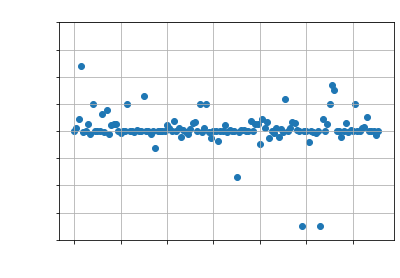

In [ ]:
plt.scatter(xaxis, sentiment[0])
plt.grid()
plt.title(f[0] + ' Sentiment Per Sentence', color='w')
plt.xlabel('Sentence', color='w')
plt.ylabel('Sentiment', color='w')
plt.xticks(color='w')
plt.yticks(color='w')
plt.ylim(-1,1)

In [ ]:
xaxis = []
for i in range(len(sentiment[2])): # sentiment[0] is the list of sentiments for the first key word
  xaxis.append(i)
print("The xaxis is {}.".format(xaxis))

The xaxis is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46].


(-1.0, 1.0)

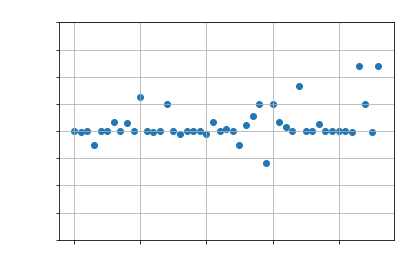

In [ ]:
plt.scatter(xaxis, sentiment[2])
plt.grid()
plt.title(f[2] + ' Sentiment Per Sentence', color='w')
plt.xlabel('Sentence', color='w')
plt.ylabel('Sentiment', color='w')
plt.xticks(color='w')
plt.yticks(color='w')
plt.ylim(-1,1)

## <font color='black'>Step 10. Store All article data in DataFrame </font>  
<font color='grey'>Note: This is not just the filtered data, this contains all information from each web page. While not used in this project, it represents all of the original data used in this run. It can be used for reference.</font> 

In [ ]:
# Put parsed data into Pandas DataFrame
df = pd.DataFrame(out_list)
df

,Text,url
0,Urlaubsgäste aus den Kreisen Gütersloh und War...,https://www.zeit.de/gesellschaft/2020-06/coron...
1,Trotz Kontaktbeschränkungen sind Zehntausende ...,https://www.zeit.de/gesellschaft/2020-06/gross...
2,"Maskenpflicht in Zügen und Flugzeugen, Einbahn...",https://www.zeit.de/gesellschaft/zeitgeschehen...
3,Mehr als ein Dutzend verletzte Polizisten und ...,https://www.zeit.de/gesellschaft/zeitgeschehen...
4,Die Zahl der Sterbefälle in Deutschland im Mai...,https://www.zeit.de/gesellschaft/2020-06/coron...
5,In der Schweiz soll die Ehe für alle zugelasse...,https://www.zeit.de/gesellschaft/familie/2020-...
6,Ein Londoner Gericht hat einen Mann mit IS-Ver...,https://www.zeit.de/gesellschaft/zeitgeschehen...
7,Nach den Ausschreitungen in der Stuttgarter In...,https://www.zeit.de/gesellschaft/zeitgeschehen...
8,Das Ziel des gemeinsamen Lernens von Schülerin...,https://www.zeit.de/gesellschaft/schule/2020-0...
9,In Göttingen haben Bewohner und Bewohnerinnen ...,https://www.zeit.de/gesellschaft/2020-06/goett...


<font color='orange'>Step 8.</font> <font color='skyblue'> Search </font>  All sentences for Key Words and return only those consisting of a key word

